# An Analysis of How to be a Successful Film Studio
Author: Carl Schneck


![Movie Theater](images/red-movie-theater-seats_slim.jpg)

-------
## Introduction

Microsoft has a newly found interest in creating their own original video content and are moving forward by starting their own movie studio. The question to be explored is what direction Microsoft should pursue to make sure they are on a pass to success. There are two versions of success to possibly be pursued. Making sure to create a film that is highly rated, and or one that performs greatly in the box office assuring a profit on the expendtiure. While it would be ideal for both of these to happen coincidingly it may not always be possible. For instance a film may have a very high rating, but be stuck in a niche market and not have exceptional performance in the box office. For instances like this it may be better to concentrate on ensuring a positive return on the financial investments. By trying to ensure a profit the film studio can continue to pursue more films as realize a return on their investment. Therefore this analysis will concentrate on the monetary factors instead of ratings to determine the correct path for Microsoft.

----

## Goal
    
The overall goal for this analysis is to lead Microsoft on a successful journey into making their own original video content. This will be achieved by supplying Microsoft with three actions that will give them the highest chance of success.

----------------

## Business Understanding and Method

<p>Now what monetary factors need to be considered to determine a profitable film. Each film has different revenue streams as well as expenses. The resources available permit the use of box office revenues, as well as production budget for expenses. Some research from the links below give insight on what percentage the film studio actually realizes after taxes and the cinema's get their share. This source of information also supplied a guideline to calculate the marketing costs in relation to production budget for films with a production budget greater than \$30 million. Since this information was only available for films in that production range, those will be the only ones included in this analysis. Though a brief analysis showing why it is dificult to analyze those films without that information will be made. Analyzing these details will give a reasonable answer to what determines a film to be profitable.<\p>

<ul>
    <li><a href = "https://stephenfollows.com/how-movies-make-money-hollywood-blockbusters/" target="_blank">How movies make money: \$100m+ Hollywood blockbusters</a></li>
    <li><a href = "https://stephenfollows.com/films-make-money-pt2-30m-100m-movies/" target="_blank">How films make money pt2: \$30m-\$100m movies</a></li>
</ul>

<br>
The information regarding marketing costs and adjusted gross revenues for cinema shares and taxes acquired from these articles is listed below:

<ul>
    <li>Average Domestic Gross Revenue Realized =~ 53%</li>
    <li>Average International Gross Revenue Realized =~ 41%</li>
    <li>Marketing Costs =~ 81% of Production Budget when Production Budget >= \$100 Million</li>
    <li>Marketing Costs =~ 100% to 120% of Production Budget when Production Budget Between \$30-\$100 Million</li>
</ul>

<br>
Therefore a film is determined to be profitable if:

<h5>(Adjusted Domestic Gross Revenue) + (Adjusted Internation Gross Revenue) > (Production Budget) + (Marketing Costs)</h5>

Where Adjusted Gross Revenues are the box office revenue figures provided adjusted to take out the percentage taken from Taxes and Cinema Shares.

Now that the definition of a profitable film has been made, movie genres that will ensure the best chance to succeed will be researched. First genres will be looked at seperately followed by an analysis of genre pairings. The success rate, average Percentage on Investment (POI), and correlation between Production Budget and POI will be used to determine the best genres and pairings. Groups with high success rates and average Percentage on Investment will be placed on the top of the list. While groups with either high or no correlation between production budget and POI will be considered. High correlation will be considered because it gives an easily manageable metric that is directly related to the return on investment. Groups with no correlation will also be considered if the grouping meets the other two conditions. Reason being that no correlation will show that the risk can be limited by not requiring a high expense line.

----------------

## Understanding Available Data

This section will be used to analyze all available data sets supplied to complete this project. Through this process the best data sets will be chosen to complete the needs for this analysis.

The provided data sets include:

<ol>
    <li>im.db   (A SQL database from IMDB)</li>
    <li>bom.movie_gross.csv.gz    (A csv file with data from Box Office Movies)</li>
    <li>tmdb.movies.csv.gz    (A csv file with data from The Movie Database)</li>
    <li>tn.movie_budgets.csv.gz    (A csv file with data from The Numbers)</li>
    <li>rt.movie_info.tsv.gz    (A tsv file with data from Rotten Tomato)</li>
    <li>rt.reviews.tsv.gz    (Another tsv file with data from Rotten Tomato)</li>
</ol>

In [1]:
# Importing all relevant libraries
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pandasql import sqldf

%matplotlib inline

pysqldf = lambda q: sqldf(q, globals())

#### Checking IMDB SQL database

<p>Set up connection to the SQL database from imdb.</p>

In [2]:
# Connecting to imdb SQL database im.db
conn = sqlite3.connect('zippedData/im.db/im.db')

<p>The schema for this database is already given to us through the Project 1 introduction on Canvas, but I would like to explore how it could be done if it was not provided. The steps I took are as listed below.</p>

<ol>
    <li>Grab all table names from SQL database.</li>
    <li>For each table find Primary keys and contained data columns.</li>
    <li>Observe data column headers for contained data.</li>
</ol>

#### 1. Grab and store all table names into object `table_names`

In [3]:
#Storing all table names from SQL database in object 'table_names'
table_names = pd.read_sql("""
SELECT name 
FROM sqlite_master 
WHERE type='table';
""", conn)

How many tables are there, and what are their titles?

In [4]:
#Print out number of tables and their titles
print('Number of tables: {}'.format(len(table_names)))
list(table_names['name'])

Number of tables: 8


['movie_basics',
 'directors',
 'known_for',
 'movie_akas',
 'movie_ratings',
 'persons',
 'principals',
 'writers']

There are a total of 8 tables, with titles as show above. Some titles are a bit ambiguous including `known_for`, `persons` and `principals`. To understand what these tables are referring to more analysis needs to be performed on their contents.


#### 2. Find tables primary keys and all contained data column headers.

In [5]:
#Iterates through the list of table_names making a query into each to grab contents
for table in list(table_names['name']):
#     Grabs only column headers from each table in temporary object 'cols'
    cols = list(pd.read_sql("""PRAGMA table_info({});""".format(table),conn)['name'])
    print('Table Name: {}\nPrimary Key: {}\nAll Columns: {}\n'.format(table, cols[0], list(cols)))

Table Name: movie_basics
Primary Key: movie_id
All Columns: ['movie_id', 'primary_title', 'original_title', 'start_year', 'runtime_minutes', 'genres']

Table Name: directors
Primary Key: movie_id
All Columns: ['movie_id', 'person_id']

Table Name: known_for
Primary Key: person_id
All Columns: ['person_id', 'movie_id']

Table Name: movie_akas
Primary Key: movie_id
All Columns: ['movie_id', 'ordering', 'title', 'region', 'language', 'types', 'attributes', 'is_original_title']

Table Name: movie_ratings
Primary Key: movie_id
All Columns: ['movie_id', 'averagerating', 'numvotes']

Table Name: persons
Primary Key: person_id
All Columns: ['person_id', 'primary_name', 'birth_year', 'death_year', 'primary_profession']

Table Name: principals
Primary Key: movie_id
All Columns: ['movie_id', 'ordering', 'person_id', 'category', 'job', 'characters']

Table Name: writers
Primary Key: movie_id
All Columns: ['movie_id', 'person_id']



#### 3. Observe column headers for contained data

This SQL database contains a lot of qualitative information. It contains data on persons in each film including directors, writes and actors. Also present are the genres, ratings and runtime. There is no monetary details included but maybe this dataset can be joined with another so these aspects can be compared.

The supplied schema for this database is shown below:
![IMDB SQL Database Schema](images/movie_data_erd.jpeg)

### Checking Box Office Movies dataset

In [6]:
# Reading Box Office Movies csv file using pandas and printing first five entries.
df_bom = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
print(df_bom.shape)
df_bom.head()

(3387, 5)


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


The Box Office Movie dataset contains gross revenue data that was missing from the IMDB dataset. Though this data is necessary for the analysis, it is missing any expense information. 

### Checking The Movie Database file

In [7]:
# Reading The Movie Database csv file using pandas and printing first five entries.
df_tmdb = pd.read_csv('zippedData/tmdb.movies.csv.gz', index_col=0)
print(df_tmdb.shape)
df_tmdb.head()

(26517, 9)


,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


This database contains very similar data to the IMDB SQL database, but with less categories.

### Checking The Numbers database

In [8]:
# Reading The Numbers csv file using pandas and printing first five entries.
df_tn = pd.read_csv('zippedData/tn.movie_budgets.csv.gz', index_col=0)
print(df_tn.shape)
df_tn.head()

(5782, 5)


,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


The Numbers database contains all the monetary information that is needed. On top of the gross revenue data it also has the production budget wich was not a part of the Box Office Movies dataset.

## Checking the Rotten Tomato datasets

In [9]:
# Reading the Rotten Tomato's tsv files using pandas and printing first five entries of each.
df_rt_MI = pd.read_csv('zippedData/rt.movie_info.tsv.gz', delimiter='\t', index_col=0)
print(df_rt_MI.shape)
df_rt_MI.head()

(1560, 11)


,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
id,,,,,,,,,,,
1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [10]:
df_rt_R = pd.read_csv('zippedData/rt.reviews.tsv.gz', delimiter='\t', encoding='latin1', index_col=0)
print(df_rt_R.shape)
df_rt_R.head()

(54432, 7)


,review,rating,fresh,critic,top_critic,publisher,date
id,,,,,,,
3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


The two Rotten Tomato datasets contain information that is already included in the IMDB and The Numbers datasets. The only addition these datasets bring are critic reviews and film synopsis.

After analyzing all the available datasets. The IMDB and The Numbers data sets appear to contain all the information needed to perform this analysis.


-------------------------------------------------------------------------------------------------------------------------------


## Data Preparation

Create dataframe from imdb SQL database containing information from tables `movie_basics` and `movie_ratings`.

In [11]:
# Gathers all data from tables movie_basics and movie_ratings
df_imdb = pd.read_sql("""
SELECT *
FROM movie_basics
JOIN movie_ratings
USING(movie_id)
""", conn)

In [12]:
# Quick observation of created dataframe
print(df_imdb.shape)
df_imdb.head()

(73856, 8)


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [13]:
# Refresh memory of dataframe contents from The Numbers from which monetary information is found
df_tn.head(1)

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"


Join the information from IMDB and The Numbers so the dataset contains all available information that is helpful.

In [14]:
# Join imdb and The Numbers dataframes together
q = """
SELECT *
FROM df_imdb
JOIN df_tn
ON df_imdb.primary_title = df_tn.movie
"""

# Creates dataframe
df_basics_and_monetary = pysqldf(q)

In [15]:
# Quick observation of created dataframe
print(df_basics_and_monetary.shape)
df_basics_and_monetary.head()

(2875, 14)


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,26,"Dec 31, 2012",Foodfight!,"$45,000,000",$0,"$73,706"
1,tt0326592,The Overnight,The Overnight,2010,88.0,None,7.5,24,21,"Jun 19, 2015",The Overnight,"$200,000","$1,109,808","$1,165,996"
2,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,17,"Mar 22, 2013",On the Road,"$25,000,000","$720,828","$9,313,302"
3,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,37,"Dec 25, 2013",The Secret Life of Walter Mitty,"$91,000,000","$58,236,838","$187,861,183"
4,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,67,"Sep 19, 2014",A Walk Among the Tombstones,"$28,000,000","$26,017,685","$62,108,587"


This newly joined dataframe was created from two seperate sources, therefore a check to see if entries are valid is needed. Since each entry from the IMDB data set has a unique `movie_id`, a check to see if a many-one join was made is done by checking the values of `movie_id`.

In [16]:
# Checking if there was any many-one combinations between data from different sources
movie_counts = df_basics_and_monetary.movie_id.value_counts()
movie_counts[movie_counts > 1]

tt1502407    3
tt2545384    3
tt2075392    3
tt2393825    3
tt2093100    3
            ..
tt1267297    2
tt4178092    2
tt1343092    2
tt4532826    2
tt0816462    2
Name: movie_id, Length: 114, dtype: int64

There appears to be many multiple entries, observing one may show more information.

In [17]:
# Checking a movie_id with multiple entries
df_basics_and_monetary[df_basics_and_monetary.movie_id == 'tt1502407']

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
588,tt1502407,Halloween,Halloween,2018,106.0,"Horror,Thriller",6.6,88395,15,"Aug 31, 2007",Halloween,"$15,000,000","$58,269,151","$77,514,401"
589,tt1502407,Halloween,Halloween,2018,106.0,"Horror,Thriller",6.6,88395,36,"Oct 19, 2018",Halloween,"$10,000,000","$159,342,015","$254,900,667"
590,tt1502407,Halloween,Halloween,2018,106.0,"Horror,Thriller",6.6,88395,37,"Oct 17, 1978",Halloween,"$325,000","$47,000,000","$70,000,000"


A quick observation shows that the `start_year` and `release_date` columns initially from the IMDb and The Numbers sets respectively contain variable information and may be used to determine the correct movie information.

Find the difference in the two dated columns and observe if it can be used to determine the correct entry.

In [18]:
# Creates a column containing the release year as an integer pulled from release_date
df_basics_and_monetary['release_year'] = df_basics_and_monetary.release_date.map(lambda x: int(x[-4:]))
# Checking for correct results
df_basics_and_monetary.head(1)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,26,"Dec 31, 2012",Foodfight!,"$45,000,000",$0,"$73,706",2012


In [19]:
# Create copy of intial database for analysis
df_basics_and_monetary_copy = df_basics_and_monetary.copy()
# Create new column year_dif containing differenc of dated columns
df_basics_and_monetary_copy['year_dif'] = df_basics_and_monetary.start_year - df_basics_and_monetary.release_year
# Displays volue counts for each result
df_basics_and_monetary_copy.year_dif.value_counts()

 0      1498
-1       295
-2        80
 2        57
 1        50
        ... 
 85        1
-9         1
 55        1
 35        1
 101       1
Name: year_dif, Length: 72, dtype: int64

Most results are either the same year or within two years of eachother. Through manual analysis on IMDb and The Numbers website it's hard to say if movies that don't have matching dates are the same, cases have been found for both. Checking all those entries manually will take too long, therefore only the entries with the same year will be kept.

In [20]:
# Drop entries not of the same year. 
df_basics_and_monetary_copy = df_basics_and_monetary_copy.query('year_dif == 0')
# Check if each entry is unique
df_basics_and_monetary_copy.movie_id.value_counts()

tt1645089    1
tt0892769    1
tt1670345    1
tt1922685    1
tt1130884    1
            ..
tt1375670    1
tt7137380    1
tt4795124    1
tt2039338    1
tt2334873    1
Name: movie_id, Length: 1498, dtype: int64

In [21]:
# Copy new dataframe into original
df_basics_and_monetary = df_basics_and_monetary_copy.copy()
df_basics_and_monetary.head(1)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,year_dif
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,26,"Dec 31, 2012",Foodfight!,"$45,000,000",$0,"$73,706",2012,0


Some columns are reduntant or unnecessary and should be dropped.

In [22]:
# Removing redundant and unnecessary columns
df_basics_and_monetary.drop(columns = ['original_title','movie','release_date','year_dif'], inplace=True)

In [23]:
# Checking information for complete datasets and Dtypes
df_basics_and_monetary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1498 entries, 0 to 2854
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           1498 non-null   object 
 1   primary_title      1498 non-null   object 
 2   start_year         1498 non-null   int64  
 3   runtime_minutes    1490 non-null   float64
 4   genres             1496 non-null   object 
 5   averagerating      1498 non-null   float64
 6   numvotes           1498 non-null   int64  
 7   id                 1498 non-null   int64  
 8   production_budget  1498 non-null   object 
 9   domestic_gross     1498 non-null   object 
 10  worldwide_gross    1498 non-null   object 
 11  release_year       1498 non-null   int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 152.1+ KB


It appears that columns `genres` and `runtime_minutes` have null values. While all the monetary information is of type `object` instead of `int`.

Observing null values for `runtime_minutes`.

In [24]:
df_basics_and_monetary[df_basics_and_monetary.runtime_minutes.isna() == True]

,movie_id,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,production_budget,domestic_gross,worldwide_gross,release_year
558,tt1472211,The Bounty Hunter,2010,NaN,None,6.3,29,73,"$45,000,000","$67,061,228","$135,808,837",2010
681,tt1586713,Burlesque,2010,NaN,Drama,7.0,45,24,"$55,000,000","$39,440,655","$90,552,675",2010
883,tt1717210,Should've Been Romeo,2012,NaN,"Comedy,Drama",6.5,44,96,"$5,000,000",$0,$0,2012
1922,tt3231362,Destiny,2014,NaN,"Adventure,Comedy,Family",8.4,25,84,"$750,000",$0,$450,2014
2240,tt4192918,The Promise,2017,NaN,Comedy,8.8,53,78,"$90,000,000","$8,224,288","$10,551,417",2017
2274,tt4317898,Big Eyes,2014,NaN,Documentary,7.2,43,23,"$10,000,000","$14,482,031","$27,317,872",2014
2344,tt4607906,Romantic Schemer,2015,NaN,Romance,5.3,178,72,"$125,000",$0,$0,2015
2725,tt6858500,Robin Hood,2018,NaN,None,7.6,5,9,"$99,000,000","$30,824,628","$84,747,441",2018


There appears to not be many entries without data, but they also contain valuable data so they are not easy to dispose of. Since there are only a few entries with missing entries, manual insertion will be performed. Notice that the two entries with missing information for genres are also present so that makes them easy to find and replace as well. 

Also noted are the $0 values for some of the gross revenue values. First thought would be that these movies were never finished, but seeing that they have a rating it must mean that they were probably release on a tv network or only in certain areas.

To fill in the missing information a dictionary is created containing the `index` and column: value pairs included.

In [25]:
# Checking if genre inputs for movies with multiple genres are in lists
print(df_basics_and_monetary.genres.loc[883])
type(df_basics_and_monetary.genres.loc[883])

Comedy,Drama


str

Multiple genres are entered as a string, seperated by a column with no space.

In [26]:
# Create dictionary with missing values to be entered
missing_values = {558: {'runtime_minutes': 110.0, 'genres': 'Action,Comedy,Romance'},
                  681: {'runtime_minutes': 119.0},
                  883: {'runtime_minutes': 90.0},
                  1922: {'runtime_minutes': 96.0},
                  2240: {'runtime_minutes': 115.0},
                  2274: {'runtime_minutes': 106.0},
                  2344: {'runtime_minutes': 84.0},
                  2725: {'runtime_minutes': 116.0, 'genres': 'Action,Adventure,Drama,Thriller'}
                 }

In [27]:
# Iterate through dictionary filling in missing values
for movie in list(missing_values.keys()):
    for param in list(missing_values[movie].keys()):
        df_basics_and_monetary.loc[movie, param] = missing_values[movie][param]

In [28]:
# Checking if all missing values have been filled in
df_basics_and_monetary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1498 entries, 0 to 2854
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           1498 non-null   object 
 1   primary_title      1498 non-null   object 
 2   start_year         1498 non-null   int64  
 3   runtime_minutes    1498 non-null   float64
 4   genres             1498 non-null   object 
 5   averagerating      1498 non-null   float64
 6   numvotes           1498 non-null   int64  
 7   id                 1498 non-null   int64  
 8   production_budget  1498 non-null   object 
 9   domestic_gross     1498 non-null   object 
 10  worldwide_gross    1498 non-null   object 
 11  release_year       1498 non-null   int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 192.1+ KB


Now to make monetary entries type `int`. This requires the removal of commas and dollar signs.

In [29]:
# Funciton to remove $ and , from str and turn variable into an integer
def money_str_to_int(x):
    x = int(x.replace('$', '').replace(',', ''))
    return x

In [30]:
# Use function to change monetary values into integers
df_basics_and_monetary.production_budget = df_basics_and_monetary.production_budget.map(money_str_to_int)
df_basics_and_monetary.domestic_gross = df_basics_and_monetary.domestic_gross.map(money_str_to_int)
df_basics_and_monetary.worldwide_gross = df_basics_and_monetary.worldwide_gross.map(money_str_to_int)

# Check info to see if function worked
df_basics_and_monetary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1498 entries, 0 to 2854
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           1498 non-null   object 
 1   primary_title      1498 non-null   object 
 2   start_year         1498 non-null   int64  
 3   runtime_minutes    1498 non-null   float64
 4   genres             1498 non-null   object 
 5   averagerating      1498 non-null   float64
 6   numvotes           1498 non-null   int64  
 7   id                 1498 non-null   int64  
 8   production_budget  1498 non-null   int64  
 9   domestic_gross     1498 non-null   int64  
 10  worldwide_gross    1498 non-null   int64  
 11  release_year       1498 non-null   int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 192.1+ KB


-------------------------------------------------------------------------------------------------------------------------------

## Data Analysis

### Monetary Analysis

In this section the aforementioned variables determining a profitable film will be calculated.

To analyze international growth and use it to calculate adjusted worldwide gross lets create another column by subtracting `worldwide_gross` by `domestic_gross`.

In [31]:
# Creates new column for international gross
df_basics_and_monetary['international_gross'] = (
    df_basics_and_monetary.worldwide_gross
    - df_basics_and_monetary.domestic_gross)

Let's take a quick look at the basic statistics for the gross revenue metrics.

In [32]:
# A quick basic analysis performing statistical calculations on whole dataset
df_basics_and_monetary.describe()

,start_year,runtime_minutes,averagerating,numvotes,id,production_budget,domestic_gross,worldwide_gross,release_year,international_gross
count,1498.000000,1498.000000,1498.000000,1.498000e+03,1498.000000,1.498000e+03,1.498000e+03,1.498000e+03,1498.000000,1.498000e+03
mean,2013.844459,107.394526,6.288318,1.148142e+05,50.892523,4.483078e+07,5.650938e+07,1.418544e+08,2013.844459,8.534505e+07
std,2.566518,18.086407,1.071363,1.641172e+05,28.813148,5.622902e+07,8.491064e+07,2.347110e+08,2.566518,1.568797e+08
min,2010.000000,5.000000,1.600000,5.000000e+00,1.000000,1.500000e+04,0.000000e+00,0.000000e+00,2010.000000,0.000000e+00
25%,2012.000000,94.000000,5.700000,1.405750e+04,26.000000,8.000000e+06,3.243797e+06,8.477965e+06,2012.000000,1.703700e+06
50%,2014.000000,105.000000,6.400000,5.843150e+04,51.000000,2.300000e+07,2.786025e+07,5.250312e+07,2014.000000,2.119365e+07
75%,2016.000000,118.000000,7.000000,1.405365e+05,76.000000,5.500000e+07,6.756418e+07,1.593420e+08,2016.000000,8.573991e+07
max,2019.000000,180.000000,8.800000,1.841066e+06,100.000000,4.106000e+08,7.000596e+08,2.048134e+09,2019.000000,1.369319e+09


The monetary statistics have very large standard deviations and IQR. The 75% quartile is almost a full degree higher than the 25% quartile for all for monetary categories. This is most likely driven by the presence of zero values and a very wide spread set of values.

Some histograms to showcase these results.

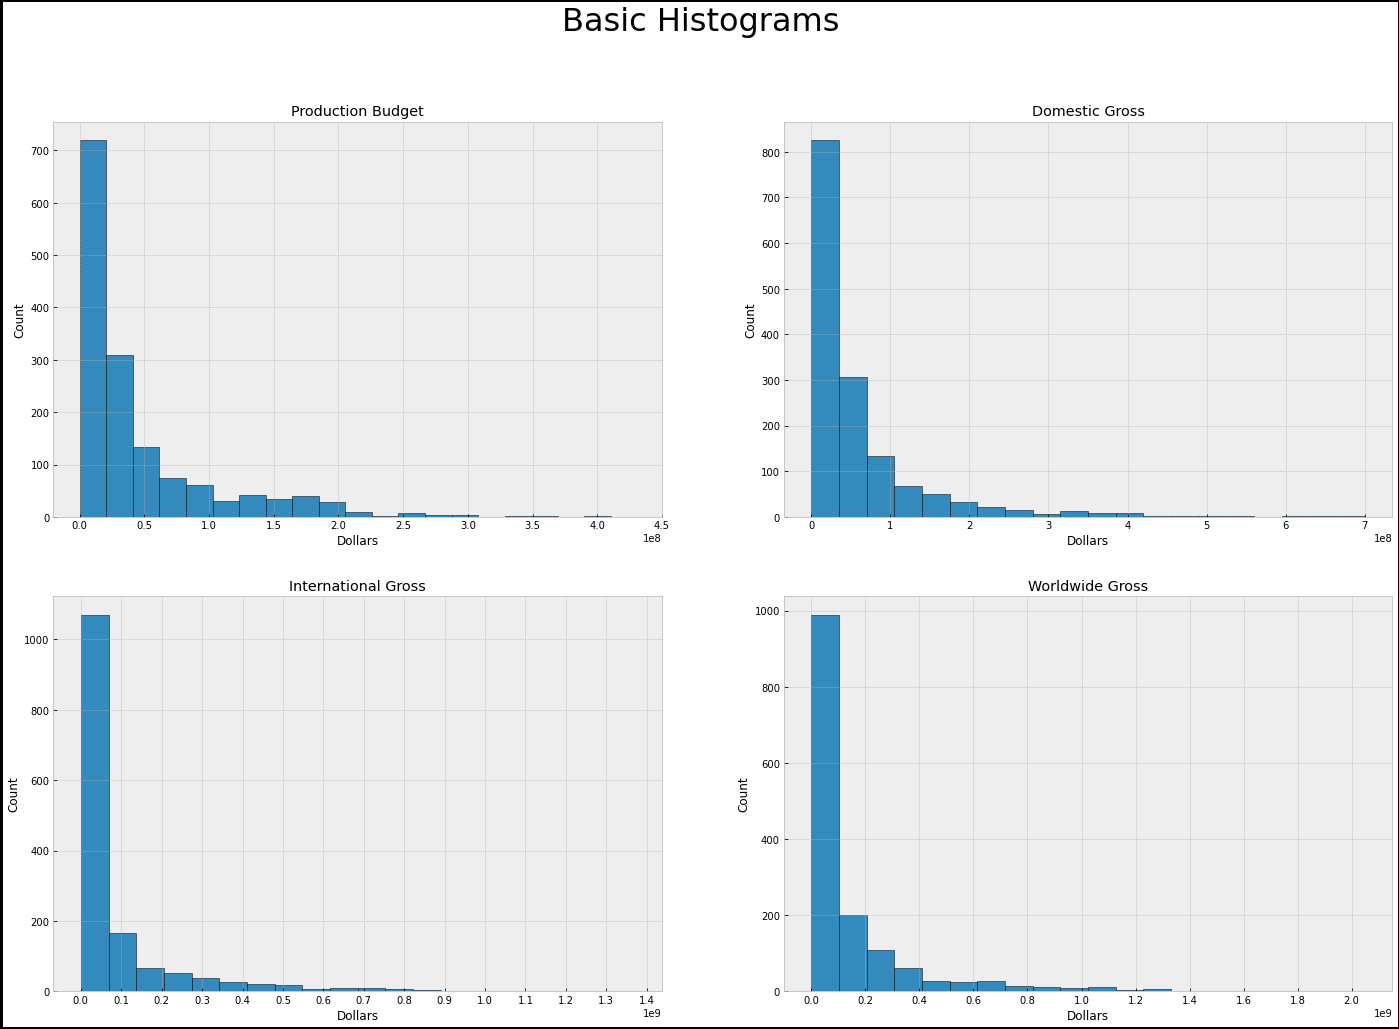

In [33]:
# Creates three seperate histograms for the three monetary categories
plt.style.use('bmh')
fig, axes = plt.subplots(figsize=(24,16), ncols=2, nrows=2, linewidth=5, edgecolor='black');
fig.suptitle('Basic Histograms', fontsize=32)

# Production Budget
axes[0][0].hist(df_basics_and_monetary.production_budget, bins=20, edgecolor='black');
axes[0][0].set_xticks(np.linspace(0,4.5e8,10));
axes[0][0].set_title('Production Budget');
axes[0][0].set_xlabel('Dollars');
axes[0][0].set_ylabel('Count');

# Domestic Gross
axes[0][1].hist(df_basics_and_monetary.domestic_gross, bins=20, edgecolor='black');
axes[0][1].set_xticks(np.linspace(0,7e8,8));
axes[0][1].set_title('Domestic Gross');
axes[0][1].set_xlabel('Dollars');
axes[0][1].set_ylabel('Count');

# International Gross
axes[1][0].hist(df_basics_and_monetary.international_gross, bins=20, edgecolor='black');
axes[1][0].set_xticks(np.linspace(0,1.4e9,15));
axes[1][0].set_title('International Gross');
axes[1][0].set_xlabel('Dollars');
axes[1][0].set_ylabel('Count');

# Worldwide Gross
axes[1][1].hist(df_basics_and_monetary.worldwide_gross, bins=20, edgecolor='black');
axes[1][1].set_xticks(np.linspace(0,2e9,11));
axes[1][1].set_title('Worldwide Gross');
axes[1][1].set_xlabel('Dollars');
axes[1][1].set_ylabel('Count');

Also curious how production budget relates to the gross revenue categories. Let's use scatter plots to observe the correlation between them.

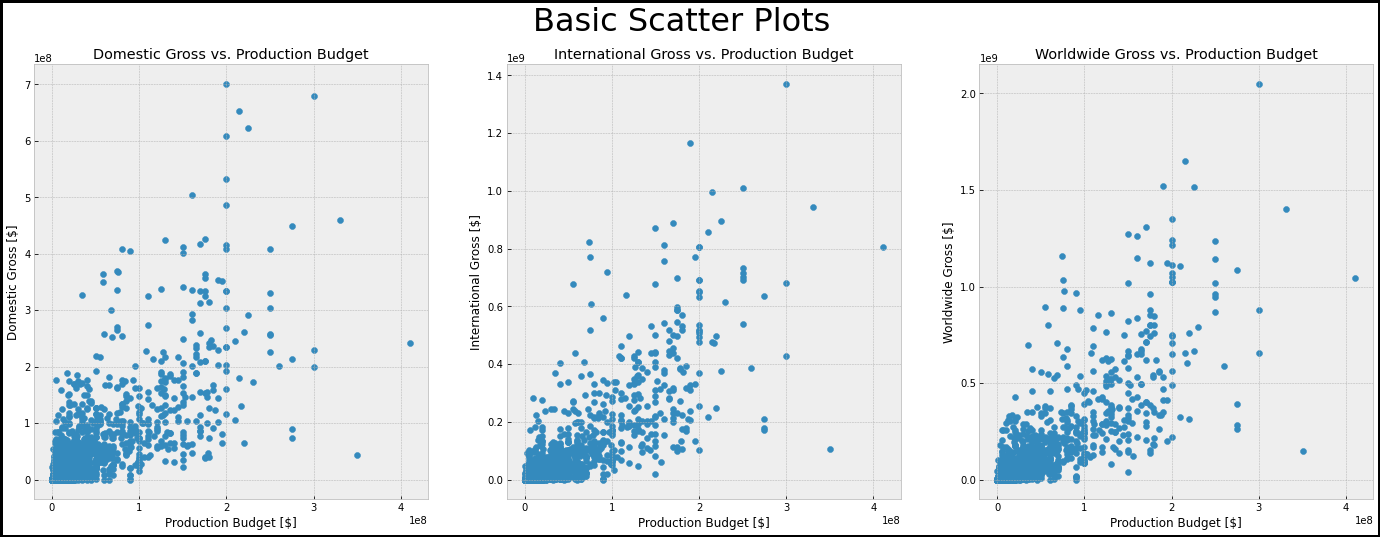

In [34]:
# Creates scatterplots relating production budget to domestic gross and worldwide gross relatively.
fig, axes = plt.subplots(figsize=(24,8), ncols=3, nrows=1, linewidth=5, edgecolor='black');
fig.suptitle('Basic Scatter Plots', fontsize=32)

# Production Budget vs Domestic Gross
axes[0].scatter(df_basics_and_monetary.production_budget,
             df_basics_and_monetary.domestic_gross);
axes[0].set_title('Domestic Gross vs. Production Budget');
axes[0].set_xlabel('Production Budget [$]');
axes[0].set_ylabel('Domestic Gross [$]');

# Production Budget vs International Gross
axes[1].scatter(df_basics_and_monetary.production_budget,
             df_basics_and_monetary.international_gross);
axes[1].set_title('International Gross vs. Production Budget');
axes[1].set_xlabel('Production Budget [$]');
axes[1].set_ylabel('International Gross [$]');

# Production Budget vs Worldwide Gross
axes[2].scatter(df_basics_and_monetary.production_budget,
             df_basics_and_monetary.worldwide_gross);
axes[2].set_title('Worldwide Gross vs. Production Budget');
axes[2].set_xlabel('Production Budget [$]');
axes[2].set_ylabel('Worldwide Gross [$]');

As to be expected there appears to be a positive correlation between the two, but it must be noted that the axes limits are not the same. To be able to make more accurate observations lets add lines to the figure showing different regions of profitability by using the factors found earlier for marketing costs and adjusted gross revenues.

To visualize mentioned metrics that affect profit better we have:

<ol>
    <li>Production Budget</li>
    <li>Average Domestic Gross Revenue Realized =~ 53%</li>
    <li>Average International Gross Revenue Realized =~ 41%</li>
    <li>Marketing Costs =~ 81% of Production Budget when Production Budget >= \$100 Million</li>
    <li>Marketing Costs =~ 100% to 120% of Production Budget when Production Budget Between \$30-\$100 Million</li>
</ol>    

<br>
Therefore to better visualize if these films have been profitable lets add new adjusted studio gross revenue columns to the dataframe. While modifying the dataframe lets add columns for marketing costs as well as net revenue. With these new values re-plot histograms with multiple section lines.

<ul>
    <li>Line showing 1:1 ratio of Production Budget to new Gross Revenue Values</li>
    <li>Lines showing offset of marketing costs on worldwide gross</li>
    <li>Line showing 25% net revenue for reference on worldwide gross</li>
</ul>

<br>
Since estimated marketing costs aren't available for films with budgets under \$30 Million they will be excluded in this part of the analysis. It will also be assumed that any movie that has a domestic gross of \$0 wasn't realeased in theatres, so they will also be removed from this database.

In [35]:
"""
Creates new dataframe with new columns for adj revenue, marketing costs and net revenue for films with
production budgets greater than $30 million  and domestic gross greater than zero.
"""

q = """
WITH adj_values1 AS (
SELECT movie_id, 
       (domestic_gross*.53) AS adj_dom_gross,
       (international_gross*.41) AS adj_int_gross,
       CASE
         WHEN production_budget >= 100000000 THEN production_budget*.81
         ELSE production_budget*1.1
       END AS marketing_cost
FROM df_basics_and_monetary
WHERE (production_budget >= 3*(10000000)) & (domestic_gross > 0)
),
adj_values2 AS (
SELECT *, (adj_dom_gross + adj_int_gross) AS adj_ww_gross
FROM adj_values1
)

SELECT df.*, adj_dom_gross, adj_int_gross, adj_ww_gross, marketing_cost,
       (adj_ww_gross - (production_budget + marketing_cost)) AS net_revenue
FROM df_basics_and_monetary AS df
JOIN adj_values2
USING(movie_id)
"""

# Create a dataframe where it only contains movies with a produciton budget above 30mil
# longform - dataframe_adjusted_greaterthan30millionProductionBudget
df_adj_gt30milPB = pysqldf(q)

In [36]:
# Shows size of new database and check if new columns are added correctly
print(df_adj_gt30milPB.shape)
df_adj_gt30milPB.head(2)

(658, 18)


,movie_id,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,production_budget,domestic_gross,worldwide_gross,release_year,international_gross,adj_dom_gross,adj_int_gross,adj_ww_gross,marketing_cost,net_revenue
0,tt0359950,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,37,91000000,58236838,187861183,2013,129624345,3.086552e+07,5.314598e+07,8.401151e+07,100100000.0,-1.070885e+08
1,tt0369610,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,34,215000000,652270625,1648854864,2015,996584239,3.457034e+08,4.085995e+08,7.543030e+08,174150000.0,3.651530e+08


In [37]:
"""
Defines points for a positve line y = mx crossing the origin by using max values of data
to use input already created axes with desired limits, and desired slop of line
"""
def xy_pos_diag(x, y, slope):
    x_max = max(x)
    y_max = max(y)
    if x_max*slope > y_max:
        p2 = [y_max/slope, y_max]
    else:
        p2 = [x_max, x_max*slope]
    return [[0,p2[0]],[0,p2[1]]]

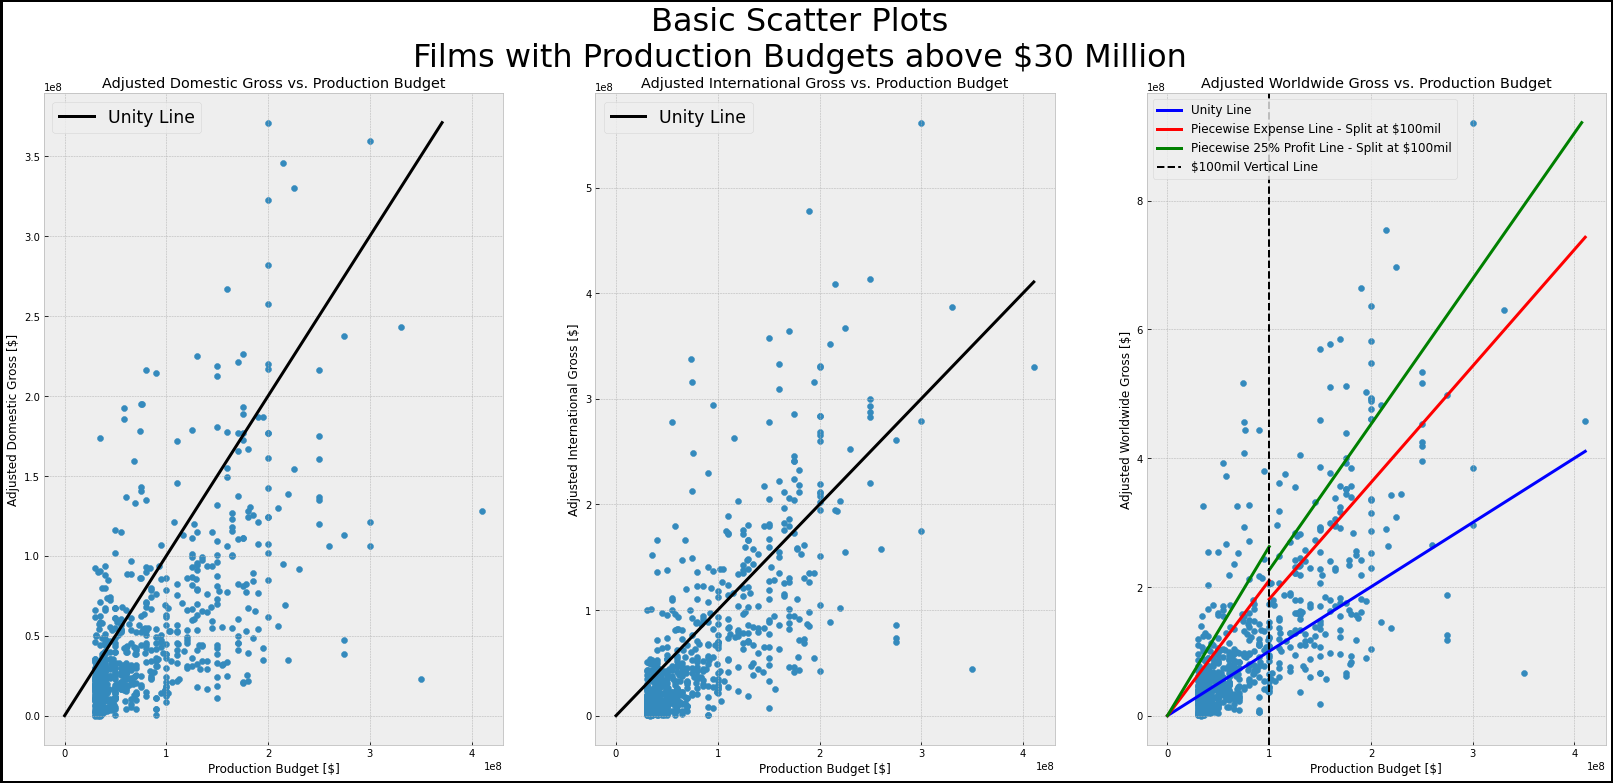

In [38]:
"""
Creates scatterplots relating production budget to adj domestic gross and adj worldwide gross relatively.
Also adding reference lines for different expense and profit levels.
"""
high_mark = .81
low_mark = 1.1

fig, axes = plt.subplots(figsize=(28,12), ncols=3, nrows=1,
                         linewidth=5, edgecolor='black');
fig.suptitle('Basic Scatter Plots\n\
Films with Production Budgets above $30 Million', fontsize=32)


# Plot for production budget vs adjusted domestic gross
axes[0].scatter(df_adj_gt30milPB.production_budget,
                df_adj_gt30milPB.adj_dom_gross);
# Plotting unity line
ax0_diag_m1 = xy_pos_diag(df_adj_gt30milPB.production_budget,
                          df_adj_gt30milPB.adj_dom_gross, 1)
ax0_line = axes[0].plot(ax0_diag_m1[0], ax0_diag_m1[1],
                        color='black', linewidth=3,
                        label='Unity Line');
axes[0].set_title('Adjusted Domestic Gross vs. Production Budget');
axes[0].set_xlabel('Production Budget [$]');
axes[0].set_ylabel('Adjusted Domestic Gross [$]');
axes[0].legend(fontsize='xx-large')


# Plot for production budget vs adjusted international gross
axes[1].scatter(df_adj_gt30milPB.production_budget,
                df_adj_gt30milPB.adj_int_gross);
# Plotting unity line
ax1_diag_m1 = xy_pos_diag(df_adj_gt30milPB.production_budget,
                       df_adj_gt30milPB.adj_int_gross, 1)
ax1_line = axes[1].plot(ax1_diag_m1[0], ax1_diag_m1[1],
                        color='black', linewidth=3, label='Unity Line');                             
axes[1].set_title('Adjusted International Gross vs. Production Budget');
axes[1].set_xlabel('Production Budget [$]');
axes[1].set_ylabel('Adjusted International Gross [$]');
axes[1].legend(fontsize='xx-large')


# Plot for produciton budget vs worldwide gross
# This axes will have the most information since profit is determined from overall gross
axes[2].scatter(df_adj_gt30milPB.production_budget,
                df_adj_gt30milPB.adj_ww_gross);
# Plotting unity line
ax2_diag_m1 = xy_pos_diag(df_adj_gt30milPB.production_budget,
                          df_adj_gt30milPB.adj_ww_gross, 1)
ax2_line1 = axes[2].plot(ax2_diag_m1[0], ax2_diag_m1[1], color='blue',
                         linewidth=3, label='Unity Line');
# Plotting expense line for prod budget under $100mil
ax2_diag_exp_l = xy_pos_diag(df_adj_gt30milPB.production_budget,
                             df_adj_gt30milPB.adj_ww_gross,
                             low_mark+1)
ax2_line2 = axes[2].plot([0,1e8], [0, (1e8/ax2_diag_exp_l[0][1])
                                       *ax2_diag_exp_l[1][1]],
                         color='red', linewidth=3,
                         label='Piecewise Expense Line - Split at $100mil');
# Plotting expense line for prod budget over $100mil
ax2_diag_exp_h = xy_pos_diag(df_adj_gt30milPB.production_budget,
                             df_adj_gt30milPB.adj_ww_gross,
                             high_mark+1)
axes[2].plot([1e8, ax2_diag_exp_h[0][1]], 
             [(1e8/ax2_diag_exp_h[0][1])*ax2_diag_exp_h[1][1],
              ax2_diag_exp_h[1][1]], color='red', linewidth=3);
# Plotting 25% profit line for prod budget under $100mil
ax2_diag_25prof_l = xy_pos_diag(df_adj_gt30milPB.production_budget,
                                df_adj_gt30milPB.adj_ww_gross,
                                ((low_mark+1)*1.25))
ax2_line3 = axes[2].plot([0,1e8], [0, (1e8/ax2_diag_25prof_l[0][1])
                                       *ax2_diag_25prof_l[1][1]],
                         color='green', linewidth=3,
                         label='Piecewise 25% Profit Line - Split at $100mil');
# Plotting 25% profit line for prod budget over $100mil
ax2_diag_25prof_h = xy_pos_diag(df_adj_gt30milPB.production_budget,
                                df_adj_gt30milPB.adj_ww_gross,
                                ((high_mark+1)*1.25))
axes[2].plot([1e8, ax2_diag_25prof_h[0][1]], 
             [(1e8/ax2_diag_25prof_h[0][1])*ax2_diag_25prof_h[1][1],
              ax2_diag_25prof_h[1][1]], color='green', linewidth=3);
# Plotting vertical line at $100mil 
ax2_line4 = axes[2].axvline(x=1e8, ymin=0, ymax=1, color='black',
                            ls='--', label='$100mil Vertical Line');
axes[2].set_title('Adjusted Worldwide Gross vs. Production Budget');
axes[2].set_xlabel('Production Budget [$]');
axes[2].set_ylabel('Adjusted Worldwide Gross [$]');
axes[2].legend(fontsize = 'large');

<p>As can be seen above, most films appear to fall below the expense line denoting that they were unprofitable by the average factors taken into consideration. One fault in this piecewise analysis is the region around films with a production budget around \$100 million. The gap where those lines should realisticly meet may leave films on the wrong side of the expense line.</p>

Let's check what percentage of movies were profitable above the expense line.

In [39]:
print('{}% of films were profitable after taking into account production budget,\
average marketing costs,\nand adjusted revenues.'
      .format(df_adj_gt30milPB.net_revenue.gt(0).value_counts(normalize=True)[True]*100))

19.6048632218845% of films were profitable after taking into account production budget,average marketing costs,
and adjusted revenues.


Now how many earned just above the production budget?

In [40]:
print('{}% of films earned more than their production budget.'
     .format(df_adj_gt30milPB.adj_ww_gross.gt(df_adj_gt30milPB.production_budget)
             .value_counts(normalize=True)[True]*100))


57.75075987841946% of films earned more than their production budget.


Let's see what the POI (Percentage on Investment) is while taking both production and marketing costs into account.

In [41]:
# Creates a new column for POI
df_adj_gt30milPB['adj_POI'] = (df_adj_gt30milPB.net_revenue
                            /(df_adj_gt30milPB.production_budget+
                             df_adj_gt30milPB.marketing_cost))*100

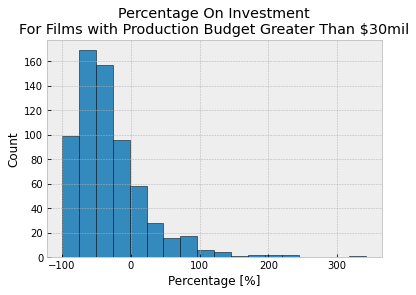

In [42]:
# Plots histogram for POI
df_adj_gt30milPB.adj_POI.hist(bins=18, edgecolor='black');
plt.title('Percentage On Investment\nFor Films with Production Budget Greater Than $30mil');
plt.xlabel('Percentage [%]');
plt.ylabel('Count');

Let's also check the basic statistics of POI.

In [43]:
df_adj_gt30milPB.adj_POI.describe()

count    658.000000
mean     -30.706939
std       52.943342
min      -99.945732
25%      -66.355063
50%      -43.234667
75%       -7.972764
max      342.524595
Name: adj_POI, dtype: float64

<p>The mean POI is at a loss of around 30%. Also as shown before more than 75% of films with a production budget over \$30 million realize a loss. Let's break this down into two categories of over and under $100 million since that's where the piecewise function splits.</p>

In [44]:
# Basic statistics for films with a budget above $100mil
print('Statistics for films with a production budget greater than $100mil')
df_adj_gt30milPB[df_adj_gt30milPB.production_budget >= 1e8].adj_POI.describe()

Statistics for films with a production budget greater than $100mil


count    221.000000
mean     -19.839988
std       43.088774
min      -93.081940
25%      -52.705382
50%      -27.195716
75%        5.321550
max      109.871537
Name: adj_POI, dtype: float64

In [45]:
# Basic statistics for films with a budget between $30mill and $100mil
print('Statistics for films with a production budget between $30mil and $100mil')
df_adj_gt30milPB[df_adj_gt30milPB.production_budget <= 1e8].adj_POI.describe()

Statistics for films with a production budget between $30mil and $100mil


count    455.000000
mean     -36.627319
std       55.690978
min      -99.945732
25%      -71.132026
50%      -49.177870
75%      -21.956876
max      342.524595
Name: adj_POI, dtype: float64

<p>This shows that films with production budgets over \$100 million tend to perform better in the box office, with a mean POI of around -19% and a 75th percentile making a profit.</p>

<p>Even though marketing data isn't included for films with production budgets under \$30 million a brief look at their financials should be taken. Let's acquire the same information as found for films with higher budgets but instead of POI it will be Percentage on Production Budget.</p>

In [46]:
"""
Creates new dataframe with new columns for adj revenue, net over production 
budget and Percentage on Production Budget for films with production budgets 
under $30 million and domestic gross greater than zero.
"""

q = """
WITH adj_values1 AS (
SELECT movie_id, production_budget,
       (domestic_gross*.53) AS adj_dom_gross,
       (international_gross*.41) AS adj_int_gross
FROM df_basics_and_monetary
WHERE (production_budget < 3*(10000000)) & (domestic_gross > 0)
),
adj_values2 AS (
SELECT *, (adj_dom_gross + adj_int_gross) AS adj_ww_gross
FROM adj_values1
),
adj_values3 AS (
SELECT *, (adj_ww_gross - production_budget) AS net_over_pb
FROM adj_values2
)

SELECT df.*, adj_dom_gross, adj_int_gross, adj_ww_gross, net_over_pb,
       (100*(net_over_pb/df.production_budget)) AS adj_POPB         
FROM df_basics_and_monetary AS df
JOIN adj_values3
USING(movie_id)
"""

# Create a dataframe where it only contains movies with a produciton budget under 30mil
# longform - dataframe_adjusted_lowerthan30millionProductionBudget
df_adj_lt30milPB = pysqldf(q)

In [47]:
# Shows size of new database and check if new columns are added correctly
print(df_adj_lt30milPB.shape)
df_adj_lt30milPB.head(2)

(684, 18)


,movie_id,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,production_budget,domestic_gross,worldwide_gross,release_year,international_gross,adj_dom_gross,adj_int_gross,adj_ww_gross,net_over_pb,adj_POPB
0,tt0365907,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,67,28000000,26017685,62108587,2014,36090902,13789373.05,14797269.82,28586642.87,586642.87,2.095153
1,tt0431021,The Possession,2012,92.0,"Horror,Mystery,Thriller",5.9,53649,81,14000000,49130588,82925064,2012,33794476,26039211.64,13855735.16,39894946.80,25894946.80,184.963906


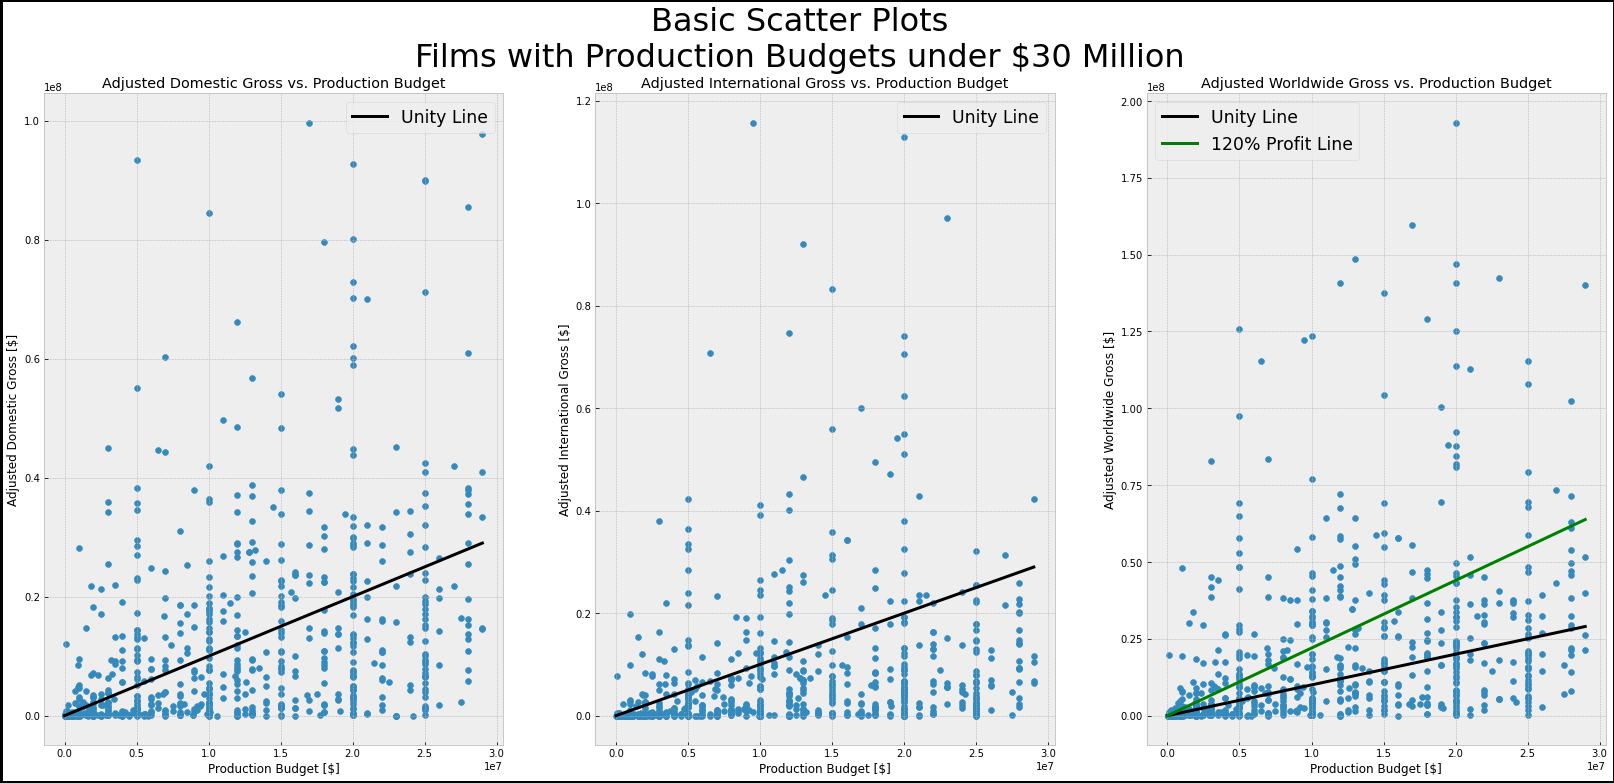

In [48]:
"""
Creates scatterplots relating production budget to adj domestic gross and adj worldwide gross relatively.
Also adding reference lines for different expense and profit levels.
"""

fig, axes = plt.subplots(figsize=(28,12), ncols=3, nrows=1,
                         linewidth=5, edgecolor='black');
fig.suptitle('Basic Scatter Plots\n\
Films with Production Budgets under $30 Million', fontsize=32)


# Plot for production budget vs adjusted domestic gross
axes[0].scatter(df_adj_lt30milPB.production_budget,
                df_adj_lt30milPB.adj_dom_gross);
# Plotting unity line
ax0_diag_m1 = xy_pos_diag(df_adj_lt30milPB.production_budget,
                          df_adj_lt30milPB.adj_dom_gross, 1)
ax0_line = axes[0].plot(ax0_diag_m1[0], ax0_diag_m1[1],
                        color='black', linewidth=3,
                        label='Unity Line');
axes[0].set_title('Adjusted Domestic Gross vs. Production Budget');
axes[0].set_xlabel('Production Budget [$]');
axes[0].set_ylabel('Adjusted Domestic Gross [$]');
axes[0].legend(fontsize='xx-large')


# Plot for production budget vs adjusted international gross
axes[1].scatter(df_adj_lt30milPB.production_budget,
                df_adj_lt30milPB.adj_int_gross);
# Plotting unity line
ax1_diag_m1 = xy_pos_diag(df_adj_lt30milPB.production_budget,
                       df_adj_lt30milPB.adj_int_gross, 1)
ax1_line = axes[1].plot(ax1_diag_m1[0], ax1_diag_m1[1],
                        color='black', linewidth=3, label='Unity Line');                             
axes[1].set_title('Adjusted International Gross vs. Production Budget');
axes[1].set_xlabel('Production Budget [$]');
axes[1].set_ylabel('Adjusted International Gross [$]');
axes[1].legend(fontsize='xx-large')


# Plot for produciton budget vs worldwide gross
# This axes will have the most information since profit is determined from overall gross
axes[2].scatter(df_adj_lt30milPB.production_budget,
                df_adj_lt30milPB.adj_ww_gross);
# Plotting unity line
ax2_diag_m1 = xy_pos_diag(df_adj_lt30milPB.production_budget,
                          df_adj_lt30milPB.adj_ww_gross, 1)
ax2_line1 = axes[2].plot(ax2_diag_m1[0], ax2_diag_m1[1], color='black',
                         linewidth=3, label='Unity Line');
# Plotting %120 profit line for reference
ax2_diag_120prof_l = xy_pos_diag(df_adj_lt30milPB.production_budget,
                                df_adj_lt30milPB.adj_ww_gross, 2.2)
ax2_line2 = axes[2].plot(ax2_diag_120prof_l[0], ax2_diag_120prof_l[1],
                         color='green', linewidth=3,
                         label='120% Profit Line');
axes[2].set_title('Adjusted Worldwide Gross vs. Production Budget');
axes[2].set_xlabel('Production Budget [$]');
axes[2].set_ylabel('Adjusted Worldwide Gross [$]');
axes[2].legend(fontsize = 'xx-large');

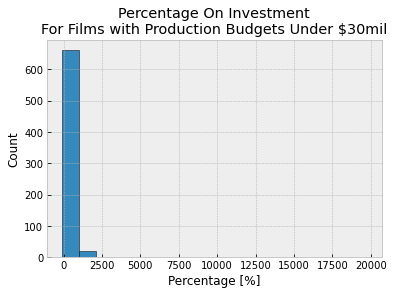

In [49]:
# Plots histogram for POI
df_adj_lt30milPB.adj_POPB.hist(bins=18, edgecolor='black');
plt.title('Percentage On Investment\nFor Films with Production Budgets Under $30mil');
plt.xlabel('Percentage [%]');
plt.ylabel('Count');

The histogram looks like this because there must be a film with a very high percentage, lets observe with a scatter plot.

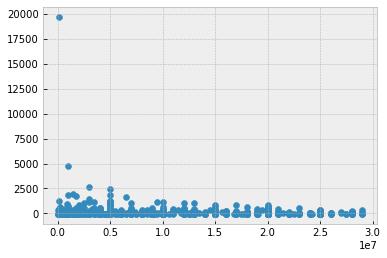

In [50]:
# Creates scatter plot
plt.scatter(df_adj_lt30milPB.production_budget, df_adj_lt30milPB.adj_POPB);

There's two films that are outliers and not included in the two bins showing on the histogram.

In [51]:
# Observes the two entries that are outliers
df_adj_lt30milPB.sort_values(by='adj_POPB', ascending=False).head()

,movie_id,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,production_budget,domestic_gross,worldwide_gross,release_year,international_gross,adj_dom_gross,adj_int_gross,adj_ww_gross,net_over_pb,adj_POPB
397,tt2309260,The Gallows,2015,81.0,"Horror,Mystery,Thriller",4.2,17763,80,100000,22764410,41656474,2015,18892064,12065137.30,7745746.24,1.981088e+07,1.971088e+07,19710.883540
184,tt1560985,The Devil Inside,2012,83.0,Horror,4.2,33522,12,1000000,53262945,101759490,2012,48496545,28229360.85,19883583.45,4.811294e+07,4.711294e+07,4711.294430
173,tt1536044,Paranormal Activity 2,2010,91.0,Horror,5.7,93122,65,3000000,84752907,177512032,2010,92759125,44919040.71,38031241.25,8.295028e+07,7.995028e+07,2665.009399
614,tt5052448,Get Out,2017,104.0,"Horror,Mystery,Thriller",7.7,400474,49,5000000,176040665,255367951,2017,79327286,93301552.45,32524187.26,1.258257e+08,1.208257e+08,2416.514794
609,tt4975722,Moonlight,2016,111.0,Drama,7.4,227964,64,1500000,27854931,65245512,2016,37390581,14763113.43,15330138.21,3.009325e+07,2.859325e+07,1906.216776


<p>Examples like the two above show why it's hard to determine if the movies were actually succesful when there is no marketing data to go by. The production budget for "The Gallows" was \$100,000 with an adjusted worldwide gross of around \$20 million. Resulting in a Percentage of Production Budget of 19,711%. According to <a href="https://www.hollywoodreporter.com/movies/movie-news/what-is-profitable-movie-ever-1269879/">this article</a> two comparable movies the "The Blair Witch Project" and "Paranormal Activity" had marketing costs of \$8 million and \$18 million respectively. While its speculative that "The Gallows" had a similar marketing cost, anything relatable would diminish it's success tremendously. Therefore without enough financial information for films with a production budget under \$30 million, only films with greater than a \$30 million production budget will be analyzed.</p>

<p>Now to answer the question at the beginning of this section as to what makes a film profitable. After looking through the available data, a return of a positive POI will be seen as profitable. Now this isn't perfect, for example a film with a 0% POI is only breaking even, and for the amount of time invested should be considered a failed investment. Though with the lacking information for other expenses and revenue streams this will be used as a baseline. It should also be noted that it was found that blockbuster films (Production Budget greater than \$100 million) have a higher average POI than films with production budgets between \$30 million and \$100 million.</p>

### Analysis of Genres and POI

<p>Next is to determine which genres are best suited to be successful. The ideal conditions for films with a production budget greater than \$30 million include:</p>

<ol>
    <li>High Success Rate</li>
    <li>High average POI</li>
    <li>High or no correlation coefficient between production budget and POI</li>
</ol>

<br>
A high success rate and high average POI are two conditions that are pretty self explanitory. They increase the chance of success and return on investment. The condition for a high correlation coefficient between production budget and POI will give a factor that can be easily changed to increase the return on investment. A genre that has no correlation between production budget and POI is good as well. That will make it safer to invest less into the project with the same rate of return as long as the other two conditions are true.

<p>First, let's check the correlation between production budget and POI for the whole dataset of films over a \$30 million production budget.</p>

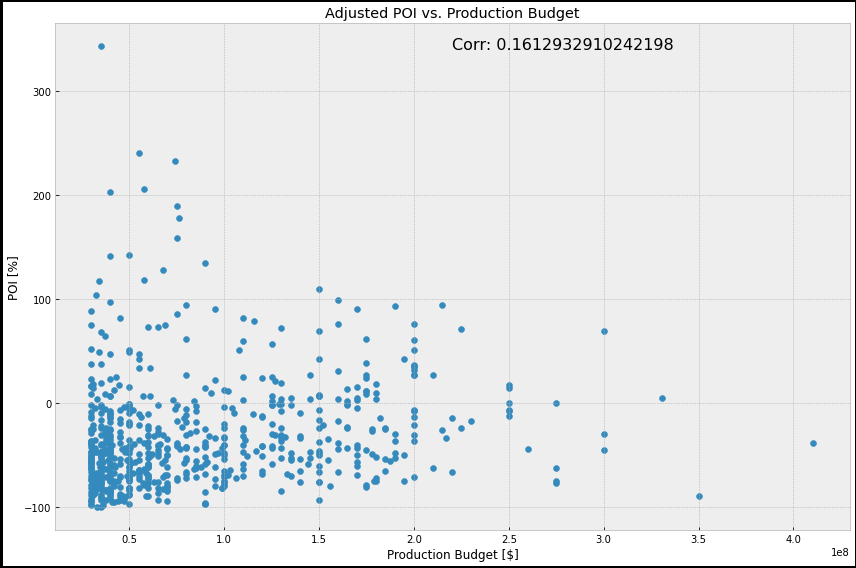

In [52]:
'''
Scatter plots with a correlation coefficient printed on each plot
'''

fig, axes = plt.subplots(figsize=(12,8), ncols=1, nrows=1,
                         linewidth=5, edgecolor='black');

# Plot for adjusted POI vs. produciton budget 
axes.scatter(df_adj_gt30milPB.production_budget,
                df_adj_gt30milPB.adj_POI);
axes.set_title('Adjusted POI vs. Production Budget');
axes.set_xlabel('Production Budget [$]');
axes.set_ylabel('POI [%]');
corr0 = df_adj_gt30milPB[['production_budget', 'adj_POI']].corr(method='pearson').iloc[0,1]
axes.text(.50, .95, 'Corr: {}'.format(corr0), transform=axes.transAxes, fontsize=16);

plt.tight_layout();

The figure above shows that there is a slight relationship between the POI and production budget with a correlation coefficient of only .16. Let's check if this changes on a genre basis.

In [53]:
# Quick look at genre contents
print(df_adj_gt30milPB.iloc[0].genres)
print(type(df_adj_gt30milPB.iloc[0].genres))
df_adj_gt30milPB.genres.value_counts()

Adventure,Comedy,Drama
<class 'str'>


Adventure,Animation,Comedy    63
Action,Adventure,Sci-Fi       51
Action,Adventure,Fantasy      31
Comedy                        22
Action,Crime,Drama            20
                              ..
Action,Drama,War               1
Comedy,Music                   1
Documentary                    1
Comedy,Crime,Thriller          1
Comedy,Horror,Romance          1
Name: genres, Length: 151, dtype: int64

As can be seen above, there are multiple genres included in some entries as data type string. To obtain a list of genres these strings need to be split into lists. Lets perform this by using the `.split` method. Also to be able to easily search for multiple genres in one film once all genres are found using the `.findall()` method a new column names `genre_str` will be created containing the original genre string format.

In [54]:
# Using split method to split genre column into lists
df_adj_gt30milPB['genre_str'] = df_adj_gt30milPB.genres
df_adj_gt30milPB['genres'] = df_adj_gt30milPB.genres.map(lambda x: x.split(','))

In [55]:
# Checks if entries were changed correctly
print(type(df_adj_gt30milPB.iloc[0].genres))
df_adj_gt30milPB.head(2)

<class 'list'>


,movie_id,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,production_budget,domestic_gross,worldwide_gross,release_year,international_gross,adj_dom_gross,adj_int_gross,adj_ww_gross,marketing_cost,net_revenue,adj_POI,genre_str
0,tt0359950,The Secret Life of Walter Mitty,2013,114.0,"[Adventure, Comedy, Drama]",7.3,275300,37,91000000,58236838,187861183,2013,129624345,3.086552e+07,5.314598e+07,8.401151e+07,100100000.0,-1.070885e+08,-56.037935,"Adventure,Comedy,Drama"
1,tt0369610,Jurassic World,2015,124.0,"[Action, Adventure, Sci-Fi]",7.0,539338,34,215000000,652270625,1648854864,2015,996584239,3.457034e+08,4.085995e+08,7.543030e+08,174150000.0,3.651530e+08,93.833475,"Action,Adventure,Sci-Fi"


Now lets create a dataframe of included genres and other factors of interest. These include:

<ul>
    <li>Frequency</li>
    <li>Average Rating</li>
    <li>Rating Tier Count(High/H,Medium/M,Low/L)</li>
    <li>Average Production Budget</li>
    <li><p>Production Budget Tier(High/H/>=\$100million,Low/L/<\$100 million)</p></li>
    <li>Average POI</li>
    <li>Count of Profitable films</li>
    <li>Count of Unprofitable films</li>
</ul>

In [56]:
# To quickly find the percentiles for average rating
df_adj_gt30milPB.averagerating.describe()

count    658.000000
mean       6.510182
std        0.887424
min        3.200000
25%        5.925000
50%        6.500000
75%        7.100000
max        8.800000
Name: averagerating, dtype: float64

In [57]:
'''
Creates a dictionary of dictionary's containing different metrics per genre.
If genre doesn't exist in dictionary yet, the try statement will move on to 
the except statement and create a blank dictionary with all required keys
and 0 values. This will then reiterate the same values through the try statement
and fill in required information.
'''

# Creates empty dictionary
genre_metrics = {}

# iterates through each index of dataframe
for i in df_adj_gt30milPB.index:
#    iterates through each genre in each entries list of genres
    for g in df_adj_gt30milPB.iloc[i].genres:
#         check for infinite loop
        for j in range(2):
#         attempts to fill in values, if dictionary key isn't present, move to except
            try:
#         Fills all genre metrics of interest
                genre_metrics[g]['tot_films'] += 1
                genre_metrics[g]['average_rating'] = ((df_adj_gt30milPB.iloc[i].averagerating
                                                    +(genre_metrics[g]['average_rating']
                                                      *(genre_metrics[g]['tot_films']-1)))
                                                   /genre_metrics[g]['tot_films'])

                genre_metrics[g]['avg_prod_budget'] = ((df_adj_gt30milPB.iloc[i].production_budget
                                                    +(genre_metrics[g]['avg_prod_budget']
                                                      *(genre_metrics[g]['tot_films']-1)))
                                                   /genre_metrics[g]['tot_films'])
                
#          H_Tier is >= 100 million, Low Tier everything below
                if df_adj_gt30milPB.iloc[i].production_budget >= 1e8:
                    genre_metrics[g]['h_pb_tier'] += 1
                else:
                    genre_metrics[g]['l_pb_tier'] += 1
                    
                genre_metrics[g]['avg_adj_POI'] = ((df_adj_gt30milPB.iloc[i].adj_POI
                                                    +(genre_metrics[g]['avg_adj_POI']
                                                      *(genre_metrics[g]['tot_films']-1)))
                                                   /genre_metrics[g]['tot_films'])
                
#          Using previously defined definition of profitable film
                if df_adj_gt30milPB.iloc[i].adj_POI >= 0:
                    genre_metrics[g]['num_of_profitable'] += 1
                else:
                    genre_metrics[g]['num_of_unprofitable'] += 1
                break
        
#          Creates dictionary for new keys
            except:
                genre_metrics[g] = {'tot_films': 0, 'average_rating': 0, 'avg_prod_budget': 0,
                                    'h_pb_tier': 0, 'l_pb_tier': 0, 'avg_adj_POI': 0,
                                    'num_of_profitable': 0, 'num_of_unprofitable': 0}
                continue

In [58]:
# Create dataframe from dictionary and check size 
df_genre_metrics_gt30milPB = pd.DataFrame(genre_metrics).transpose()
print(df_genre_metrics_gt30milPB.shape)
df_genre_metrics_gt30milPB.index.name = 'genre'
df_genre_metrics_gt30milPB.sort_values(by='tot_films', inplace=True, ascending=False)
df_genre_metrics_gt30milPB.head()

(21, 8)


,tot_films,average_rating,avg_prod_budget,h_pb_tier,l_pb_tier,avg_adj_POI,num_of_profitable,num_of_unprofitable
genre,,,,,,,,
Action,317.0,6.508517,1.060252e+08,150.0,167.0,-31.828393,63.0,254.0
Adventure,292.0,6.531849,1.251836e+08,178.0,114.0,-22.795563,72.0,220.0
Comedy,236.0,6.288559,7.360254e+07,53.0,183.0,-27.936274,43.0,193.0
Drama,227.0,6.701762,6.093921e+07,35.0,192.0,-41.153648,35.0,192.0
Crime,112.0,6.506250,5.237054e+07,9.0,103.0,-45.678178,15.0,97.0


Let's create a few plots to observe what was just calculated.

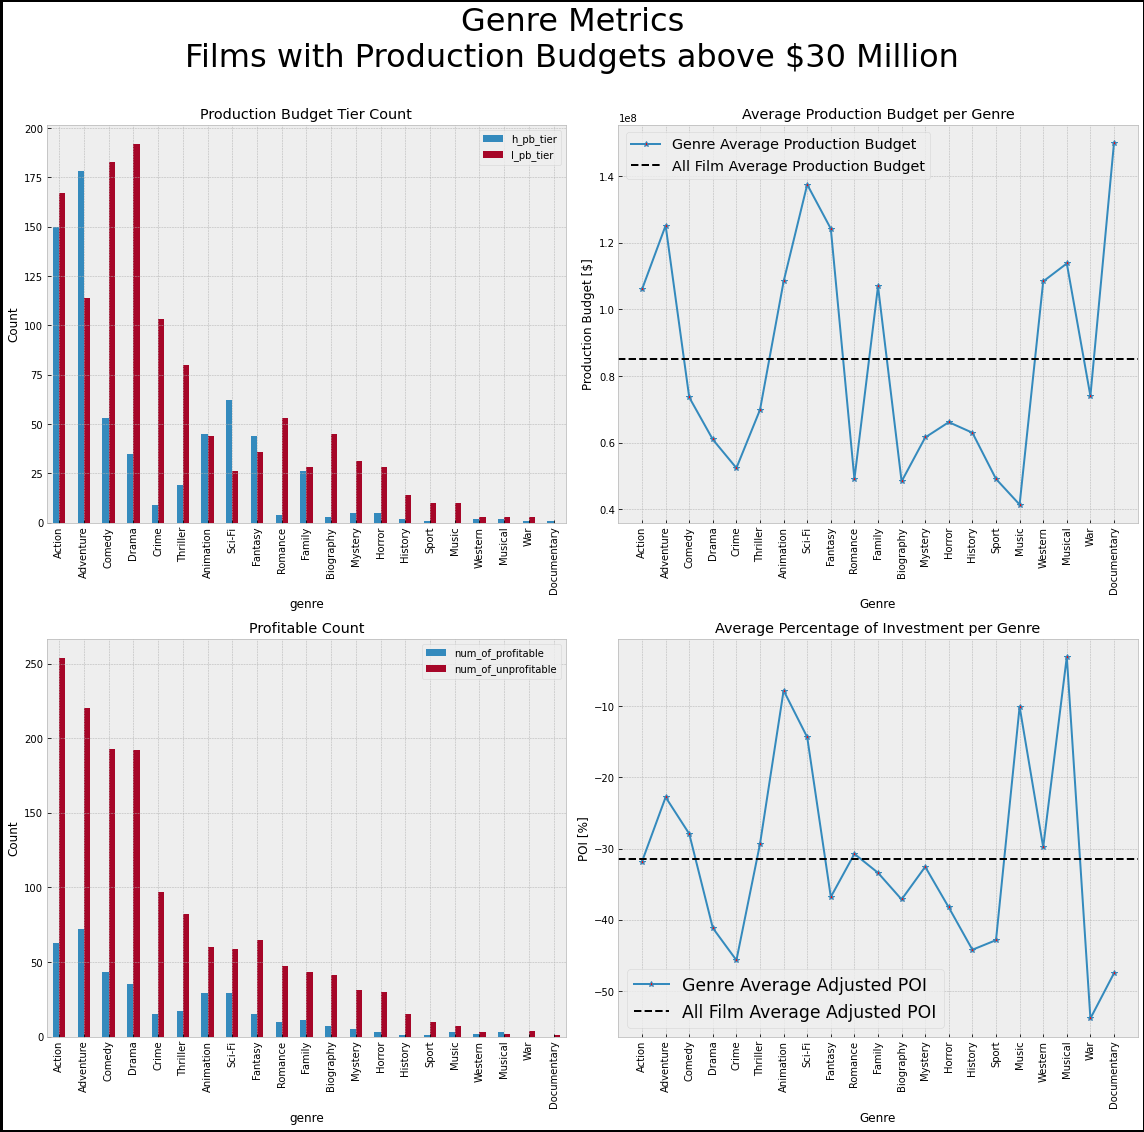

In [59]:
'''
Basic plots displaying genre statistics
'''

fig, axes = plt.subplots(figsize=(16,16), ncols=2, nrows=2, 
                        linewidth=5, edgecolor='black');
fig.suptitle('Genre Metrics\n\
Films with Production Budgets above $30 Million\n', fontsize=32);

# Bar Graph showing production budget tiers
df_genre_metrics_gt30milPB[['h_pb_tier', 'l_pb_tier']].plot.bar(ax=axes[0][0]);
axes[0][0].set_title('Production Budget Tier Count');
axes[0][0].set_ylabel('Count');

# Line plot for average production budget
axes[0][1].plot(df_genre_metrics_gt30milPB.index, df_genre_metrics_gt30milPB.avg_prod_budget,
               marker='*', mfc='red', label='Genre Average Production Budget');
axes[0][1].axhline(y=df_genre_metrics_gt30milPB.avg_prod_budget.mean(), xmin=0, xmax=1,
                  ls='--', c='black', label='All Film Average Production Budget');
axes[0][1].set_title('Average Production Budget per Genre');
axes[0][1].set_ylabel('Production Budget [$]');
axes[0][1].set_xlabel('Genre');
axes[0][1].tick_params(axis='x', labelrotation = 90);
axes[0][1].legend(fontsize='x-large', loc=2)

# Profitable and Unprofitable Bar Graph
df_genre_metrics_gt30milPB[['num_of_profitable', 'num_of_unprofitable']].plot.bar(ax=axes[1][0]);
axes[1][0].set_title('Profitable Count');
axes[1][0].set_ylabel('Count');

# Line Graph for Average Adjusted POI
axes[1][1].plot(df_genre_metrics_gt30milPB.index, df_genre_metrics_gt30milPB.avg_adj_POI,
               marker='*', mfc='red', label='Genre Average Adjusted POI');
axes[1][1].axhline(y=df_genre_metrics_gt30milPB.avg_adj_POI.mean(), xmin=0, xmax=1,
                  ls='--', c='black', label='All Film Average Adjusted POI');
axes[1][1].set_title('Average Percentage of Investment per Genre');
axes[1][1].set_ylabel('POI [%]');
axes[1][1].set_xlabel('Genre');
axes[1][1].tick_params(axis='x', labelrotation = 90);
axes[1][1].legend(fontsize='xx-large')

plt.tight_layout();

The above figure has the genres ordered by frequency, with the highest starting on the left of each plot. A clear representation of this is the first plot where it contains the cumulative sum of rating tiers. 

Some Observations from the figure above:
<ul>
    <li>The only genre with more profitable films than unprofitable were Musicals but with a very low sample size of five.</li>
    <li>The genres wtih the highest average POI were Musical, Animation, Music and Sci-Fi</li>
</ul>    

Let's now find some correlation coefficients that are genre specific.

In [60]:
'''
Creates new columns in genre metrics dataframe containing correlation coefficients
that are genre specific
'''

# Creates empty lists
rating_vs_adj_POI = []
prod_budget_vs_adj_POI = []
rating_vs_prod_budget = []

# Iterates through genres, appending correlation coefficients
for g in list(df_genre_metrics_gt30milPB.index):
    df = df_adj_gt30milPB[df_adj_gt30milPB.genre_str.str.findall(g).map(bool) == True]
    rating_vs_adj_POI.append(df[['averagerating', 'adj_POI']].corr(method='pearson').iloc[0,1])
    prod_budget_vs_adj_POI.append(df[['production_budget', 'adj_POI']].corr(method='pearson').iloc[0,1])
    rating_vs_prod_budget.append(df[['production_budget', 'averagerating']].corr(method='pearson').iloc[0,1])

# Adds new columns to dataframe for corr coef's
df_genre_metrics_gt30milPB['rating_vs_POI_corr'] = rating_vs_adj_POI
df_genre_metrics_gt30milPB['pb_vs_POI_corr'] = prod_budget_vs_adj_POI
df_genre_metrics_gt30milPB['rating_vs_pb_corr'] = rating_vs_prod_budget

In [61]:
# Checks if values were inputted correctly
df_genre_metrics_gt30milPB.head()

,tot_films,average_rating,avg_prod_budget,h_pb_tier,l_pb_tier,avg_adj_POI,num_of_profitable,num_of_unprofitable,rating_vs_POI_corr,pb_vs_POI_corr,rating_vs_pb_corr
genre,,,,,,,,,,,
Action,317.0,6.508517,1.060252e+08,150.0,167.0,-31.828393,63.0,254.0,0.457108,0.217332,0.250299
Adventure,292.0,6.531849,1.251836e+08,178.0,114.0,-22.795563,72.0,220.0,0.386929,0.125031,0.341710
Comedy,236.0,6.288559,7.360254e+07,53.0,183.0,-27.936274,43.0,193.0,0.352823,0.175384,0.317421
Drama,227.0,6.701762,6.093921e+07,35.0,192.0,-41.153648,35.0,192.0,0.226993,0.026589,0.093523
Crime,112.0,6.506250,5.237054e+07,9.0,103.0,-45.678178,15.0,97.0,0.387456,0.298239,0.140361


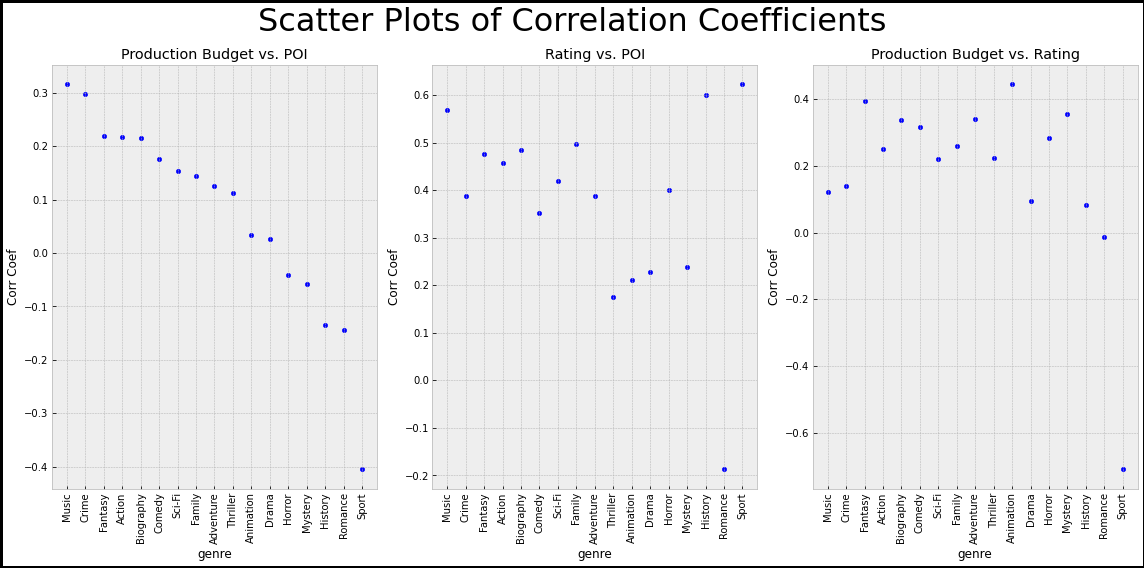

In [62]:
'''
Creates Scatter plots for genre specific correlation coeffiecients
'''

# Sorts dataframe by Production Budget and POI corr coef
df_genre_metrics_gt30milPB.sort_values(by='pb_vs_POI_corr', ascending=False, inplace=True)
df_genre_metrics_gt30milPB['genre'] = df_genre_metrics_gt30milPB.index

# Creates dataframe of genres with greater than 10 films
df = df_genre_metrics_gt30milPB.query('tot_films >= 10')

fig, axes = plt.subplots(figsize=(16,8), ncols=3, nrows=1,
                         linewidth=5, edgecolor='black');
fig.suptitle('Scatter Plots of Correlation Coefficients', fontsize=32)

# Scatter plot of production budget vs POI corr coef's
df.plot.scatter(x='genre', y='pb_vs_POI_corr', ax=axes[0]);
axes[0].set_title('Production Budget vs. POI');
axes[0].set_ylabel('Corr Coef');
axes[0].tick_params(axis='x', labelrotation = 90);

# Scatter plot of rating vs POI corr coef's
df.plot.scatter(x='genre', y='rating_vs_POI_corr', ax=axes[1]);
axes[1].set_title('Rating vs. POI');
axes[1].set_ylabel('Corr Coef');
axes[1].tick_params(axis='x', labelrotation = 90);

# Scatter plot of production budget vs rating corr coef's
df.plot.scatter(x='genre', y='rating_vs_pb_corr', ax=axes[2]);
axes[2].set_title('Production Budget vs. Rating');
axes[2].set_ylabel('Corr Coef');
axes[2].tick_params(axis='x', labelrotation = 90);

plt.tight_layout();

In [63]:
# Refresh of highest averaging POI genres
df_genre_metrics_gt30milPB.query('tot_films >= 10').avg_adj_POI.sort_values(ascending=False)

genre
Animation    -7.827639
Music       -10.090412
Sci-Fi      -14.380153
Adventure   -22.795563
Comedy      -27.936274
Thriller    -29.344376
Romance     -30.750209
Action      -31.828393
Mystery     -32.562374
Family      -33.409305
Fantasy     -36.802504
Biography   -37.147339
Horror      -38.276069
Drama       -41.153648
Sport       -42.858121
History     -44.204917
Crime       -45.678178
Name: avg_adj_POI, dtype: float64

The genres with the highest correlation coefficients between production budget and POI are Music, Crime and Fantasy. Music is also the second highest genre for average POI while Crime and Fantasy are low on the list. Also noted is Animation with almost no correlation between production budget and POI while also having the highest average POI out of individual genres. Sci-Fi can also be considered to have a pretty low correlation coefficient, while being third for highest average POI.

Let's now create a quick scatter plot to determine which genres have highest chance of success.

In [64]:
df_genre_metrics_gt30milPB.head(1)

,tot_films,average_rating,avg_prod_budget,h_pb_tier,l_pb_tier,avg_adj_POI,num_of_profitable,num_of_unprofitable,rating_vs_POI_corr,pb_vs_POI_corr,rating_vs_pb_corr,genre
genre,,,,,,,,,,,,
War,4.0,6.7,74000000.0,1.0,3.0,-53.848444,0.0,4.0,0.480251,0.96733,0.25476,War


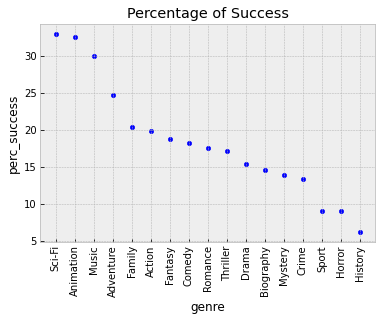

In [65]:
# Creates a scatter plot for percentage of successful films per genres that have more than
# 10 films

# Creates colums for success percentage
df_genre_metrics_gt30milPB['perc_success'] = 100*(df_genre_metrics_gt30milPB.num_of_profitable/
                                                  df_genre_metrics_gt30milPB.tot_films)
df_genre_metrics_gt30milPB.sort_values(by='perc_success', ascending=False, inplace=True)
ax = df_genre_metrics_gt30milPB.query('tot_films >= 10').plot.scatter(x='genre', y='perc_success')
ax.tick_params(axis='x', labelrotation = 90);
ax.set_title('Percentage of Success');

After checking for all three conditions the three genres closest to matching all three are Animation, Music and Sci-Fi. Animation appears to be the best fit out of the three because the correlation between production budget and POI for Music can't be considered high, just the highest out of all the genres. It should also be noted that none of these genres averaged a POI above zero. Therefore lets continue our analysis by checking if there are any genre combinations that perform better.

In [66]:
'''
Creates dataframe containing metrics for paired genres
'''

# Creates a list of genres with more than 10 films
ordered_genres = list(df_genre_metrics_gt30milPB.query('tot_films >= 10').index)
# Creates a list of all genres with the genres in ordered list at the top
all_genres = ordered_genres + list(df_genre_metrics_gt30milPB.query('tot_films < 10').index)

# Creates emptry dataframe
paired_genre_metrics = {}

# Creates start point for iteration through all genres so there are no repeats

# iterates through genres with greater than 10 films and prevents repeats
for i, g1 in enumerate(ordered_genres):
#   iterates through all genres minus repeats
    for g2 in all_genres[i+1:]:
#       Creates dataframe of films with paired genres
        df = df_adj_gt30milPB[(df_adj_gt30milPB.genre_str.str.findall(g1).map(bool) &
                                  df_adj_gt30milPB.genre_str.str.findall(g2).map(bool))]
#       Proceeds if dataframe isn't empty
        if df.empty == False:  
            ind = g1 + '/' + g2 #name for combined genre index
            paired_genre_metrics[ind] = {}
            paired_genre_metrics[ind]['tot_films'] = len(df)
            paired_genre_metrics[ind]['average_rating'] = df.averagerating.mean()
            paired_genre_metrics[ind]['avg_prod_budget'] = df.production_budget.mean()
            paired_genre_metrics[ind]['avg_adj_POI'] = df.adj_POI.mean()
            paired_genre_metrics[ind]['num_of_profitable'] = len(df[df.adj_POI >= 0])
            paired_genre_metrics[ind]['num_of_unprofitable'] = len(df[df.adj_POI < 0])
            paired_genre_metrics[ind]['perc_success'] = (paired_genre_metrics[ind]['num_of_profitable']/
                                                        paired_genre_metrics[ind]['tot_films'])*100
            paired_genre_metrics[ind]['prod_budget_POI_corr'] = df[['production_budget', 'adj_POI']]\
                                                            .corr(method='pearson').iloc[0,1]
            
            
# Creates dataframe
df_paired_genre_metrics_gt30milPB = pd.DataFrame(paired_genre_metrics).transpose()

In [67]:
# Checks if dataframe was properly filled
df_paired_genre_metrics_gt30milPB.index.name = 'genre'
df_paired_genre_metrics_gt30milPB.reset_index(inplace=True)
df_paired_genre_metrics_gt30milPB.head()

,genre,tot_films,average_rating,avg_prod_budget,avg_adj_POI,num_of_profitable,num_of_unprofitable,perc_success,prod_budget_POI_corr
0,Sci-Fi/Adventure,55.0,6.892727,1.716473e+08,-5.287137,21.0,34.0,38.181818,0.029137
1,Sci-Fi/Action,71.0,6.729577,1.512479e+08,-9.364978,26.0,45.0,36.619718,0.050467
2,Sci-Fi/Comedy,4.0,6.225000,4.975000e+07,-60.881870,0.0,4.0,0.000000,0.552472
3,Sci-Fi/Romance,2.0,7.050000,8.010000e+07,-37.626342,0.0,2.0,0.000000,1.000000
4,Sci-Fi/Thriller,10.0,6.490000,7.472000e+07,1.842831,5.0,5.0,50.000000,0.033729


Let's order this new dataframe by success rate of pairs with a count of ten or greater.

In [68]:
# Orders dataframe by percentage of success
df_paired_genre_metrics_gt30milPB.sort_values(by='perc_success', ascending=False, inplace=True)
print(df_paired_genre_metrics_gt30milPB.shape)
# Creates dataframe with genre pairs of 10 films or greater
df_paired_genre_metrics_gt30milPB = df_paired_genre_metrics_gt30milPB.query('tot_films >= 10')
# Resets index to be in chronological order for easy reference
df_paired_genre_metrics_gt30milPB.reset_index(drop=True, inplace=True)
df_paired_genre_metrics_gt30milPB.head(10)

(103, 9)


,genre,tot_films,average_rating,avg_prod_budget,avg_adj_POI,num_of_profitable,num_of_unprofitable,perc_success,prod_budget_POI_corr
0,Sci-Fi/Thriller,10.0,6.490000,7.472000e+07,1.842831,5.0,5.0,50.000000,0.033729
1,Music/Drama,10.0,6.780000,4.830000e+07,-12.628588,4.0,6.0,40.000000,0.098741
2,Sci-Fi/Adventure,55.0,6.892727,1.716473e+08,-5.287137,21.0,34.0,38.181818,0.029137
3,Animation/Action,19.0,7.231579,1.178947e+08,-11.549958,7.0,12.0,36.842105,0.281854
4,Sci-Fi/Action,71.0,6.729577,1.512479e+08,-9.364978,26.0,45.0,36.619718,0.050467
5,Animation/Comedy,72.0,6.554167,1.038542e+08,-5.832833,23.0,49.0,31.944444,0.024198
6,Animation/Adventure,80.0,6.645000,1.122188e+08,-9.465616,25.0,55.0,31.250000,0.054834
7,Family/Fantasy,18.0,6.211111,1.449389e+08,-28.678977,5.0,13.0,27.777778,0.381503
8,Adventure/Crime,11.0,6.263636,5.481818e+07,-44.316780,3.0,8.0,27.272727,0.284220
9,Sci-Fi/Drama,15.0,7.140000,9.633333e+07,-26.734081,4.0,11.0,26.666667,0.227455


The top five pairings have success rates greater than the highest individual genre success rate of around 33%. The most successful genre pairings are Sci-fi/Thriller, Music/Drama and Sci-Fi/Adventure. The inclusion of Sci-Fi and Music being a part of the top three agrees with the individual genre analysis. Animation is also included in three of the top seven pairings. Noted is the near zero correlation for all but one of the top seven pairings with Animation/Action being the outlier. 

Let's check if Sci-Fi/Thriller films are the only pairing with an average adjusted POI greater than zero.

In [69]:
df_paired_genre_metrics_gt30milPB.sort_values(by='avg_adj_POI', ascending=False).head(10)

,genre,tot_films,average_rating,avg_prod_budget,avg_adj_POI,num_of_profitable,num_of_unprofitable,perc_success,prod_budget_POI_corr
0,Sci-Fi/Thriller,10.0,6.490000,7.472000e+07,1.842831,5.0,5.0,50.000000,0.033729
2,Sci-Fi/Adventure,55.0,6.892727,1.716473e+08,-5.287137,21.0,34.0,38.181818,0.029137
5,Animation/Comedy,72.0,6.554167,1.038542e+08,-5.832833,23.0,49.0,31.944444,0.024198
4,Sci-Fi/Action,71.0,6.729577,1.512479e+08,-9.364978,26.0,45.0,36.619718,0.050467
6,Animation/Adventure,80.0,6.645000,1.122188e+08,-9.465616,25.0,55.0,31.250000,0.054834
3,Animation/Action,19.0,7.231579,1.178947e+08,-11.549958,7.0,12.0,36.842105,0.281854
1,Music/Drama,10.0,6.780000,4.830000e+07,-12.628588,4.0,6.0,40.000000,0.098741
10,Adventure/Comedy,106.0,6.464151,9.794057e+07,-13.645795,27.0,79.0,25.471698,0.102224
17,Action/Comedy,52.0,6.300000,7.967308e+07,-24.817265,10.0,42.0,19.230769,0.129206
11,Adventure/Action,173.0,6.559538,1.386561e+08,-24.894670,43.0,130.0,24.855491,0.182392


It appears that the Sci-Fi/Thriller pairing is the only one with a positive POI while also having the highest success rate. Sci-Fi/Adventure Animation/Comedy round out the top three for average POI with pretty high success rates and no correlation between production budget and POI. These two pairings also have much larger sample sizes than the Sci-Fi/Thriller Pairing.

Earlier it was also found that films with a production budget greater than \$100 million had a higher average POI than those with a lower production budget. Therefore let's see if we can narrow down our choices even further by looking at those two ranges specifically.

In [70]:
'''
Creates dataframe containing metrics for paired genres containing films with 
production budgets greater than $100 million
'''

# Creates a list of genres with more than 10 films
ordered_genres = list(df_genre_metrics_gt30milPB[df_genre_metrics_gt30milPB.tot_films >= 10].index)
# Creates a list of all genres with the genres in ordered list at the top
all_genres = ordered_genres + list(df_genre_metrics_gt30milPB[df_genre_metrics_gt30milPB.tot_films < 10].index)

# Creates emptry dataframe
paired_genre_metrics = {}

# Creates start point for iteration through all genres so there are no repeats

# iterates through genres with greater than 10 films and prevents repeats
for i, g1 in enumerate(ordered_genres):
#   iterates through all genres minus repeats
    for g2 in all_genres[i+1:]:
#       Creates dataframe of films with paired genres and production budget greater than $100 million
        df = df_adj_gt30milPB[(df_adj_gt30milPB.genre_str.str.findall(g1).map(bool) &
                               df_adj_gt30milPB.genre_str.str.findall(g2).map(bool) &
                               (df_adj_gt30milPB.production_budget >= 1e8))]
#       Proceeds if dataframe isn't empty
        if df.empty == False:  
            ind = g1 + '/' + g2 #name for combined genre index
            paired_genre_metrics[ind] = {}
            paired_genre_metrics[ind]['tot_films'] = len(df)
            paired_genre_metrics[ind]['average_rating'] = df.averagerating.mean()
            paired_genre_metrics[ind]['avg_prod_budget'] = df.production_budget.mean()
            paired_genre_metrics[ind]['avg_adj_POI'] = df.adj_POI.mean()
            paired_genre_metrics[ind]['num_of_profitable'] = len(df[df.adj_POI >= 0])
            paired_genre_metrics[ind]['num_of_unprofitable'] = len(df[df.adj_POI < 0])
            paired_genre_metrics[ind]['perc_success'] = (paired_genre_metrics[ind]['num_of_profitable']/
                                                        paired_genre_metrics[ind]['tot_films'])*100
            paired_genre_metrics[ind]['prod_budget_POI_corr'] = df[['production_budget', 'adj_POI']]\
                                                            .corr(method='pearson').iloc[0,1]
            
            
# Creates dataframe
df_paired_genre_metrics_gt100milPB = pd.DataFrame(paired_genre_metrics).transpose()

In [71]:
# Checks size as well as shows a preview
df_paired_genre_metrics_gt100milPB.index.name = 'genre'
df_paired_genre_metrics_gt100milPB.reset_index(inplace=True)
print(df_paired_genre_metrics_gt100milPB.shape)
df_paired_genre_metrics_gt100milPB.head()

(64, 9)


,genre,tot_films,average_rating,avg_prod_budget,avg_adj_POI,num_of_profitable,num_of_unprofitable,perc_success,prod_budget_POI_corr
0,Sci-Fi/Adventure,50.0,6.934000,1.830920e+08,-4.066791,20.0,30.0,40.000000,-0.042880
1,Sci-Fi/Action,56.0,6.826786,1.768857e+08,-8.694557,21.0,35.0,37.500000,0.060819
2,Sci-Fi/Romance,1.0,7.000000,1.100000e+08,-31.732783,0.0,1.0,0.000000,NaN
3,Sci-Fi/Thriller,3.0,6.566667,1.086667e+08,30.171780,2.0,1.0,66.666667,0.972144
4,Sci-Fi/Drama,9.0,7.411111,1.261111e+08,-16.018697,3.0,6.0,33.333333,-0.167441


Lets check which pairings have the highest average adjusted POI.

In [72]:
# Orders list by highest average adjuster POI
df_paired_genre_metrics_gt100milPB.sort_values(by='avg_adj_POI', ascending=False).head(20)

,genre,tot_films,average_rating,avg_prod_budget,avg_adj_POI,num_of_profitable,num_of_unprofitable,perc_success,prod_budget_POI_corr
30,Family/Musical,1.0,7.200000,1.600000e+08,99.155241,1.0,0.0,100.000000,NaN
12,Music/Family,1.0,7.200000,1.600000e+08,99.155241,1.0,0.0,100.000000,NaN
47,Fantasy/Musical,2.0,6.850000,1.800000e+08,63.190091,2.0,0.0,100.000000,-1.000000
14,Music/Musical,2.0,6.850000,1.800000e+08,63.190091,2.0,0.0,100.000000,-1.000000
13,Music/Fantasy,2.0,6.850000,1.800000e+08,63.190091,2.0,0.0,100.000000,-1.000000
55,Thriller/Crime,3.0,7.066667,1.883333e+08,45.529961,3.0,0.0,100.000000,-0.066645
3,Sci-Fi/Thriller,3.0,6.566667,1.086667e+08,30.171780,2.0,1.0,66.666667,0.972144
61,Drama/Western,1.0,8.400000,1.000000e+08,12.715726,1.0,0.0,100.000000,NaN
23,Adventure/Crime,1.0,7.500000,1.250000e+08,6.980695,1.0,0.0,100.000000,NaN
62,Biography/Crime,1.0,8.200000,1.000000e+08,-3.936490,0.0,1.0,0.000000,NaN


It appears that the top twelve pairings have less than three films each. This includes the pairing of Sci-fi and Thriller. Even though that pairing shows for this production budget range a greater chance of success and average adjusted POI, a sample size of three films is too small to use to make any concrete suggestions with.

Lets take a look at the list after eliminating any pairing with less than ten films.

In [73]:
df_paired_genre_metrics_gt100milPB = df_paired_genre_metrics_gt100milPB.query('tot_films >= 10')\
    .sort_values(by='avg_adj_POI',ascending=False)
df_paired_genre_metrics_gt100milPB.head(10)

,genre,tot_films,average_rating,avg_prod_budget,avg_adj_POI,num_of_profitable,num_of_unprofitable,perc_success,prod_budget_POI_corr
0,Sci-Fi/Adventure,50.0,6.934000,1.830920e+08,-4.066791,20.0,30.0,40.000000,-0.042880
1,Sci-Fi/Action,56.0,6.826786,1.768857e+08,-8.694557,21.0,35.0,37.500000,0.060819
10,Animation/Action,13.0,7.384615,1.433846e+08,-10.130607,5.0,8.0,38.461538,0.723420
11,Animation/Comedy,31.0,6.870968,1.529194e+08,-11.844943,11.0,20.0,35.483871,0.114811
8,Animation/Adventure,44.0,6.965909,1.498750e+08,-12.559765,16.0,28.0,36.363636,0.201351
18,Adventure/Comedy,45.0,6.788889,1.495000e+08,-12.981172,15.0,30.0,33.333333,0.078167
34,Action/Thriller,18.0,6.688889,1.508889e+08,-15.102719,6.0,12.0,33.333333,0.323230
16,Adventure/Action,122.0,6.744262,1.696656e+08,-18.227569,38.0,84.0,31.147541,0.035680
32,Action/Comedy,15.0,6.700000,1.353333e+08,-18.461994,4.0,11.0,26.666667,0.074616
27,Family/Fantasy,13.0,6.453846,1.685308e+08,-22.668094,4.0,9.0,30.769231,0.379827


The two other pairings Sci-fi/Adventure and Animation/Comedy mentioned earlier are included in this list. The Animation and ACtion pairing also looks interesting now. The pairing has a very high Production Budget to POI correlation and the second highest success rate for this set. Let's take a look at the general results from those three pairings including all their films. 

In [74]:
df_paired_genre_metrics_gt30milPB.query("(genre == 'Sci-Fi/Adventure')\
                                        | (genre == 'Animation/Comedy')\
                                        | (genre == 'Animation/Action')")

,genre,tot_films,average_rating,avg_prod_budget,avg_adj_POI,num_of_profitable,num_of_unprofitable,perc_success,prod_budget_POI_corr
2,Sci-Fi/Adventure,55.0,6.892727,1.716473e+08,-5.287137,21.0,34.0,38.181818,0.029137
3,Animation/Action,19.0,7.231579,1.178947e+08,-11.549958,7.0,12.0,36.842105,0.281854
5,Animation/Comedy,72.0,6.554167,1.038542e+08,-5.832833,23.0,49.0,31.944444,0.024198


Compairing the results from the analysis of films with a produciton budget over \$100 million and the complete colleciton shows that the pairing for Sci-Fi and Adventure has a slightly better performance when made as a blockbuster film. This is shown with a slightly higher success rate at 40% over the 38% rate seen previously. It also has a higher average adjusted POI being at -4 instead of -5.3. While the pairing for Animation and Comedy has a higher success rate as a blockbuster (36 > 32), the average adjusted POI drops by around 6 points. The added success rate may not be worth the lower possible POI. The Animation and Action pairing has a great overall success rate at 36.8%, though a little lower than the 38.5% success rate when having a higher production budget. The very high correlation of .72 between Production Budget and POI can't be overlooked as well at higher budgets. 

-------------------------------------------------------------------------------------------------------------------------------

## Conclusion

It was determined earlier that the main conditions to be considered to make a proper suggestion of genre or genre pairing for Microsoft to succeed were as follows:
<ol>
    <li>High Success Rate</li>
    <li>High average POI</li>
    <li>High or no correlation coefficient between production budget and POI</li>
</ol>

The expense baseline was found by adding the production budget and marketing cost that was researched to be a factor of the production budget. The Domestic and International revenues were also adjusted to account for taxes and cinema costs. The marketing cost. These factors were used to determine the success of films as well as their Percentage on Investment. Using these factors the success rate, average POI and the correlation between production and POI was found on a genre and genre pair basis. The following three suggestions were determined to follow these conditions the closest:

<ol>
    <li>Sci-Fi and Thriller</li>
    <li>Sci-Fi and Adventure - Blockbuster Film</li>
    <li>Animation and Action - Blockbuster Film</li>
</ol>

To explain the reasoning behind these suggestions the following figures are referenced and explained below.

<table><tr>
<td bgcolor="FFFFFF"> <img src="images/figures/POI_Boxplots.png" alt="POI Box Plots" style="width: 500px;"/> </td>
<td bgcolor="FFFFFF"> <img src="images/figures/Success_Rates.png" alt="Sucess Rates Bar Plot" style="width: 500px;"/> </td>
</tr></table>

<table><tr>
<td bgcolor="FFFFFF"> <img src="images/figures/Corr_Coef_Scatter_Plot.png" alt="Production Budget and POI correlation coefficient scatter plot" style="width: 500px;"/> </td>
<td bgcolor="FFFFFF"> <img src="images/figures/Success_Rate_PBtiered_V2.png" alt="Sucess Rates Production Budget Tiers" style="width: 500px;"/> </td>
</tr></table>

<img src="images/figures/PB_tiered_plots.png" alt="Plots for tiered Production Budget"/>

###  Sci-Fi and Thriller
<p>The genre pairing of Sci-Fi and Thriller genres has the highest average Percentage of Investment (POI) as shown in the top left figure above. It is the only genre pairing that has an average POI that is profitable. Though the box plot in the top left shows that the pairings median POI values around -20% the success rate shown in the top right figure is 50%. Meaning that half of the films with this genre pairing were profitable with a POI greater than zero. While looking at the figures showing the split between blockbuster films, films made with a production budget greater than \$100 million,  and those of less production budget. There appears to be more success with higher production budgets. The success rate of blockbusters is 67% and has a strong correlation between production budget and POI. Though the suggestion to invest in blockbuster Sci-Fi and Thriller films must be reserved because the sample might be too small to rely on these split metrics, with only three out of the ten films covering these genres being blockbusters. The success rate for this genre pairing for films under a blockbuster production budget is still around 43%, though there appears to be a negative correlation between production budget and POI for this pairing. Though these correlation coefficients may be tricky to deal with, the overall success rate of the Sci-Fi and Thriller pairing is a stellar 50% while the highest average POI of all combinations. So it is believed that this suggestion will have a great chance of success.</p>

### Sci-Fi and Adventure - Blockbuster Film 
<p>The Sci-Fi and Adventure pairing had 50 of its 55 films in this analysis be blockbusters. Of pairings with more than 10 blockbusters, this pairing had the highest success rate at 40% and average POI at -4%. Observing the boxplot above in the lower left corner this blockbuster pairing had a median close to zero POI with a 75th percentile comfortably above being profitable at around 30%. There is also no correlation between production budget POI when this pairing is made as a blockbuster. Therefore this suggestion is to proceed in the direction of a Sci-Fi and Adventure film with a production budget greater than \$100 million dollars creating a blockbuster film.</p>

### Animation and Action - Blockbuster Film
<p>The Animation and Action pairing is being suggested mostly because of its high correlation of around .72 between Production Budget and POI. Though the blockbuster Sci-Fi and Thriller pairing had an even higher correlation, it only had a sample size of three films to the sample size of 13 films for the Animation and Action pairing. Concentrating on this metric can give Microsoft a different approach at attempting to create a successful film by trying to invest more to receive a higher POI. This method does sound risky but this pairing is also backed by having a 38.5% success rate as blockbuster films, making it the second most commonly successful blockbuster pairing behind Sci-Fi and Adventure. The box plot with the split of production budget tiers shown above also points out this genre pairing's median POI value is very close to zero. Meaning that nearly 50% of Animation and Action films were either successful or very close to breaking even.</p>


-------------------------------------------------------------------------------------------------------------------------------
## Additional Figures

The work performed after this text, is to prepare figures for the conclusion and presentation.

In [75]:
'''
Creates dataframe consisting of the top ten genre pairs by success rate
'''

# Creates slice of dataframe containing all entries from the top ten genres
df_top10 = df_paired_genre_metrics_gt30milPB.sort_values(by='perc_success', ascending=False).iloc[:10]

# Creates empty dataframe to be filled
df_top10_gt30milPB = pd.DataFrame()

# Iterates through top ten genres
for gp in df_top10.genre:
#   Splits the genre pairing string so each individual genre can be searched for
    gl = gp.split('/')
#   Creates temporary dataframe for films containing both genres in pairing
    df_gp = df_adj_gt30milPB[(df_adj_gt30milPB.genre_str.str.findall(gl[0]).map(bool) &
                df_adj_gt30milPB.genre_str.str.findall(gl[1]).map(bool)) == True].copy()
#   Creates a new column for entries containing the genre pairing it was chosen with
    df_gp.loc[:,'genre_pairing'] = gp
    df_gp.loc[:,'pb_100mil'] = ['Over' if (pb >= 1e8) else 'Under' 
                                for pb in df_gp.production_budget]
#   Appends the temporary dataframe to dataframe for analysis
    df_top10_gt30milPB = df_top10_gt30milPB.append(df_gp)

# Checks contents of new dataframe
df_top10_gt30milPB.head()

,movie_id,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,production_budget,domestic_gross,...,international_gross,adj_dom_gross,adj_int_gross,adj_ww_gross,marketing_cost,net_revenue,adj_POI,genre_str,genre_pairing,pb_100mil
148,tt1234719,Red Dawn,2012,93.0,"[Action, Sci-Fi, Thriller]",5.4,69599,1,65000000,44806783,...,3357367,2.374759e+07,1.376520e+06,2.512412e+07,71500000.0,-1.113759e+08,-81.594055,"Action,Sci-Fi,Thriller",Sci-Fi/Thriller,Under
162,tt1270797,Venom,2018,112.0,"[Action, Sci-Fi, Thriller]",6.7,275406,3,116000000,213511408,...,640117197,1.131610e+08,2.624481e+08,3.756091e+08,93960000.0,1.656491e+08,78.895550,"Action,Sci-Fi,Thriller",Sci-Fi/Thriller,Over
202,tt1385826,The Adjustment Bureau,2011,106.0,"[Romance, Sci-Fi, Thriller]",7.1,227616,81,50200000,62495645,...,64435680,3.312269e+07,2.641863e+07,5.954132e+07,55220000.0,-4.587868e+07,-43.519901,"Romance,Sci-Fi,Thriller",Sci-Fi/Thriller,Under
245,tt1454468,Gravity,2013,91.0,"[Drama, Sci-Fi, Thriller]",7.7,710018,16,110000000,274092705,...,419605968,1.452691e+08,1.720384e+08,3.173076e+08,89100000.0,1.182076e+08,59.370960,"Drama,Sci-Fi,Thriller",Sci-Fi/Thriller,Over
325,tt1650062,Super 8,2011,112.0,"[Mystery, Sci-Fi, Thriller]",7.0,320575,93,50000000,127004179,...,130968566,6.731221e+07,5.369711e+07,1.210093e+08,55000000.0,1.600933e+07,15.246978,"Mystery,Sci-Fi,Thriller",Sci-Fi/Thriller,Under


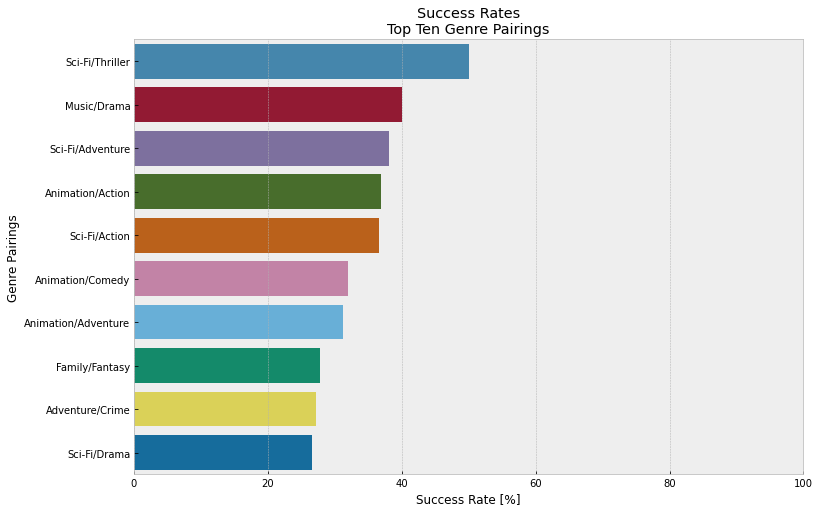

In [83]:
'''
Creates stacked bar plot for success rate of top 10 films as well as 
'''
fig, ax = plt.subplots(figsize=(12,8))

df_paired_genre_metrics_gt30milPB_top10 = df_paired_genre_metrics_gt30milPB.iloc[:10].copy()
sns.barplot(data=df_paired_genre_metrics_gt30milPB_top10,
                 x='perc_success', y='genre',
                 orient='h', ax=ax);
ax.set_xlabel('Success Rate [%]');
ax.set_ylabel('Genre Pairings');
ax.set_title('Success Rates\nTop Ten Genre Pairings');
ax.set_xlim(0,100);

# fig.savefig('images/figures/Success_Rates.png', dpi=100)

In [92]:
# Creates list of top 5 and checks contents
df_top5 = df_top10.iloc[:5].copy()

,genre,tot_films,average_rating,avg_prod_budget,avg_adj_POI,num_of_profitable,num_of_unprofitable,perc_success,prod_budget_POI_corr
0,Sci-Fi/Thriller,10.0,6.490000,7.472000e+07,1.842831,5.0,5.0,50.000000,0.033729
1,Music/Drama,10.0,6.780000,4.830000e+07,-12.628588,4.0,6.0,40.000000,0.098741
2,Sci-Fi/Adventure,55.0,6.892727,1.716473e+08,-5.287137,21.0,34.0,38.181818,0.029137
3,Animation/Action,19.0,7.231579,1.178947e+08,-11.549958,7.0,12.0,36.842105,0.281854
4,Sci-Fi/Action,71.0,6.729577,1.512479e+08,-9.364978,26.0,45.0,36.619718,0.050467


In [101]:
# Creates dataframe with all film entries in top 5 genre pairings by success rate
top5_list = list(df_top5.genre)
df_top5_gt30milPB = df_top10_gt30milPB.query('genre_pairing in @top5_list').copy()
df_top5_gt30milPB.head()

,movie_id,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,production_budget,domestic_gross,...,adj_dom_gross,adj_int_gross,adj_ww_gross,marketing_cost,net_revenue,adj_POI,genre_str,genre_pairing,pb_100mil,successful
148,tt1234719,Red Dawn,2012,93.0,"[Action, Sci-Fi, Thriller]",5.4,69599,1,65000000,44806783,...,2.374759e+07,1.376520e+06,2.512412e+07,71500000.0,-1.113759e+08,-81.594055,"Action,Sci-Fi,Thriller",Sci-Fi/Thriller,Under,N
162,tt1270797,Venom,2018,112.0,"[Action, Sci-Fi, Thriller]",6.7,275406,3,116000000,213511408,...,1.131610e+08,2.624481e+08,3.756091e+08,93960000.0,1.656491e+08,78.895550,"Action,Sci-Fi,Thriller",Sci-Fi/Thriller,Over,Y
202,tt1385826,The Adjustment Bureau,2011,106.0,"[Romance, Sci-Fi, Thriller]",7.1,227616,81,50200000,62495645,...,3.312269e+07,2.641863e+07,5.954132e+07,55220000.0,-4.587868e+07,-43.519901,"Romance,Sci-Fi,Thriller",Sci-Fi/Thriller,Under,N
245,tt1454468,Gravity,2013,91.0,"[Drama, Sci-Fi, Thriller]",7.7,710018,16,110000000,274092705,...,1.452691e+08,1.720384e+08,3.173076e+08,89100000.0,1.182076e+08,59.370960,"Drama,Sci-Fi,Thriller",Sci-Fi/Thriller,Over,Y
325,tt1650062,Super 8,2011,112.0,"[Mystery, Sci-Fi, Thriller]",7.0,320575,93,50000000,127004179,...,6.731221e+07,5.369711e+07,1.210093e+08,55000000.0,1.600933e+07,15.246978,"Mystery,Sci-Fi,Thriller",Sci-Fi/Thriller,Under,Y


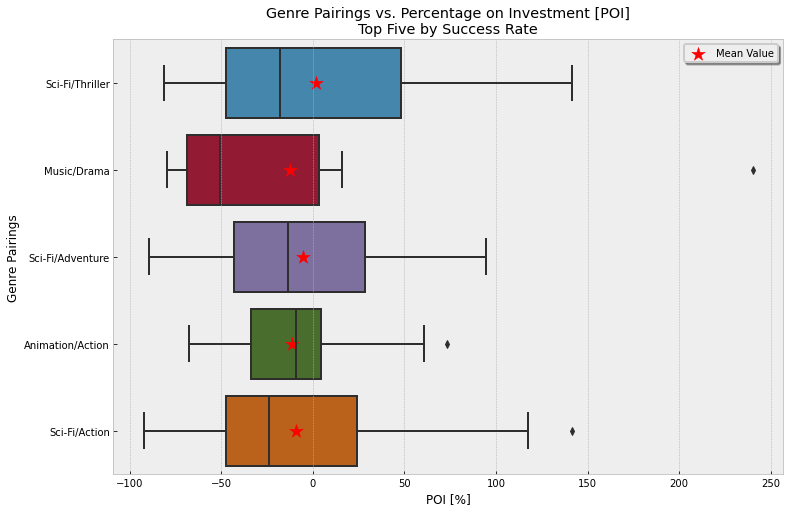

In [112]:
'''
Creates box plot for Genre Pairings vs. POI
Also contains average value of POI for each genre pairing
'''
fig, ax = plt.subplots(figsize=(12,8))

sns.boxplot(data=df_top5_gt30milPB, x='adj_POI', y='genre_pairing',
                 orient='h', order=df_top5.genre, ax=ax);
ax.scatter(x=df_top5.avg_adj_POI, y=df_top5.genre, color='red',
          marker='*', s=200, label='Mean Value');
leg = ax.legend(shadow=True);
leg.get_frame().set_linewidth(2)
ax.set_xlabel('POI [%]');
ax.set_ylabel('Genre Pairings');
ax.set_title('Genre Pairings vs. Percentage on Investment [POI]\nTop Five by Success Rate');

# fig.savefig('images/figures/POI_Boxplots_Top5.png', dpi=100)

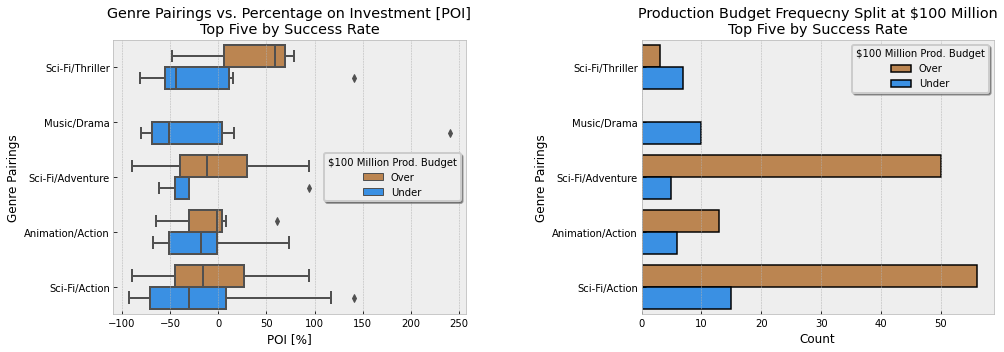

In [108]:
'''
First plot is a box plot for Genre Pairings vs. POI
Splitting each to two categories for films over and under 100 million production budget

Second plot is a bar graph showing the sample count for each production budget tier
'''
fig, axes = plt.subplots(figsize=(14,5), ncols=2, nrows=1)

# Creates boxplot for genre pairings vs POI
sns.boxplot(data=df_top5_gt30milPB, x='adj_POI', y='genre_pairing',
            hue='pb_100mil', hue_order=['Over', 'Under'], 
            order=df_top5.genre, palette=['peru', 'dodgerblue'],
            ax=axes[0]);
axes[0].set_xlabel('POI [%]');
axes[0].set_ylabel('Genre Pairings');
axes[0].set_title('Genre Pairings vs. Percentage on Investment [POI]\nTop Five by Success Rate');
leg = axes[0].legend(title='$100 Million Prod. Budget', shadow=True);
leg.get_frame().set_linewidth(2)

# Finds the Count for each prod budget tier
df_PBt_count = df_top5_gt30milPB.groupby(['genre_pairing', 'pb_100mil'])['production_budget'].count()
# Reset Index
df_PBt_count = df_PBt_count.reset_index()
# Fixing column name
df_PBt_count.rename(columns={'production_budget': 'tot_films'}, inplace=True)

# Creates bar plot for production budget frequency
sns.barplot(data=df_PBt_count ,x='tot_films', y='genre_pairing', hue='pb_100mil',
            order=df_top5.genre, palette=['peru', 'dodgerblue'], edgecolor='black',
            linewidth=1.5 , ax=axes[1])
axes[1].set_xlabel('Count');
axes[1].set_ylabel('Genre Pairings');
axes[1].set_title('Production Budget Frequecny Split at $100 Million\nTop Five by Success Rate');
leg = axes[1].legend(title='$100 Million Prod. Budget', shadow=True);
leg.get_frame().set_linewidth(2)

plt.tight_layout();
plt.subplots_adjust(wspace=.5)

<ipython-input-110-3ba8217d54fd>:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_PBt_corr_coef = df_top5_gt30milPB.groupby(['genre_pairing', 'pb_100mil'])\


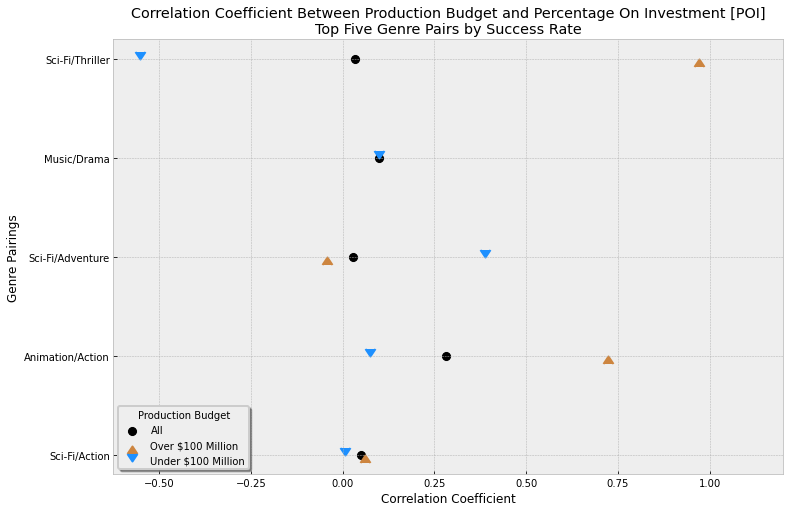

In [110]:
'''
Creates a scatter plot containing correlation coefficient of production budget
to POI for all budget tiers, greater than $100 million tier, and under $100 million
tier.
'''

#Groups correlation coef by groups above and below $100 million production budget 
df_PBt_corr_coef = df_top5_gt30milPB.groupby(['genre_pairing', 'pb_100mil'])\
    ['adj_POI', 'production_budget'].corr().unstack().iloc[:,1]
# Resets index
df_PBt_corr_coef = df_PBt_corr_coef.reset_index()
# Drops multi-index
df_PBt_corr_coef = df_PBt_corr_coef.droplevel(level=1, axis=1)
# Renames column to appropriate name
df_PBt_corr_coef.rename(columns={'adj_POI': 'pb_POI_corr_coef'}, inplace=True)

# Seperates the data into to seperate dataframe for over and under $100 million prod. budget
df_PBt_corr_coef_over = df_PBt_corr_coef[df_PBt_corr_coef['pb_100mil'] == 'Over']
df_PBt_corr_coef_under = df_PBt_corr_coef[df_PBt_corr_coef['pb_100mil'] == 'Under']

# Creates plot for three sets of data
fig, ax = plt.subplots(figsize=(12,8))

sns.scatterplot(x=df_top5.prod_budget_POI_corr, y=df_top5.genre, label='All',
                     color='k', ax=ax, s=100);
ax.scatter(x=df_PBt_corr_coef_over.pb_POI_corr_coef, 
           y=df_PBt_corr_coef_over.genre_pairing, marker=6, color='peru',
           label='Over $100 Million', s=100);
ax.scatter(x=df_PBt_corr_coef_under.pb_POI_corr_coef, 
           y=df_PBt_corr_coef_under.genre_pairing, marker=7, color='dodgerblue',
           label='Under $100 Million', s=100);
ax.set_xlim(-.625,1.2)
ax.set_title('Correlation Coefficient Between Production Budget and Percentage On Investment [POI]\n\
Top Five Genre Pairs by Success Rate')
ax.set_xlabel('Correlation Coefficient')
ax.set_ylabel('Genre Pairings')
leg = ax.legend(title='Production Budget', shadow=True);
leg.get_frame().set_linewidth(2)

# fig.savefig('images/figures/Corr_Coef_Scatter_Plot_Top5.png', dpi=100)

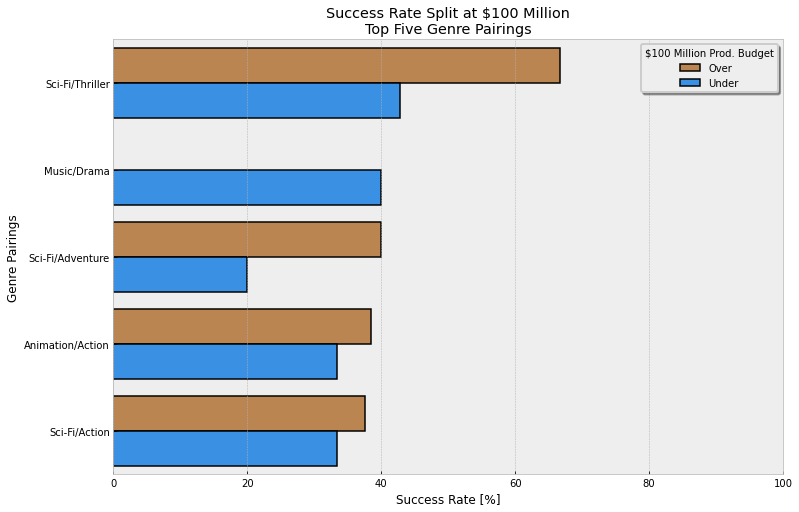

In [111]:
'''
Creates bar plot comparing success rates of genre pairing split into groups
above and below a $100 million production budget
'''

# Creates column noting if the film was successful
df_top5_gt30milPB['successful'] = ['Y' if (POI >= 0) else 'N' for POI in df_top5_gt30milPB.adj_POI]
# Get count of successful and unsuccessful films in in range and pairing
df_PBt_perc_succ = df_top5_gt30milPB.groupby(['genre_pairing', 'pb_100mil','successful'])['id'].count()
# Resets index
df_PBt_perc_succ = df_PBt_perc_succ.reset_index()
# Fixing naming for column
df_PBt_perc_succ.rename(columns={'id': 'tot_films'}, inplace=True)
# Creates new column including percentage of values
df_PBt_perc_succ['perc'] = 100*(df_PBt_perc_succ.tot_films / df_PBt_perc_succ\
                        .groupby(['genre_pairing','pb_100mil'])\
                        ['tot_films'].transform(sum))
# Only keeps values relating to the successful column
df_PBt_perc_succ = df_PBt_perc_succ.query('successful == "Y"')[['genre_pairing', 'pb_100mil', 'perc']]
# Renames columns
df_PBt_perc_succ.rename(columns={'perc': 'success_rate'}, inplace=True)

# Creates bar plot
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(data=df_PBt_perc_succ ,x='success_rate', y='genre_pairing', hue='pb_100mil',
            order=df_top5.genre, palette=['peru', 'dodgerblue'], edgecolor='black',
            linewidth=1.5, ax=ax)
ax.set_xlabel('Success Rate [%]');
ax.set_ylabel('Genre Pairings');
ax.set_title('Success Rate Split at $100 Million\nTop Five Genre Pairings');
ax.set_xlim(0,100)
leg = ax.legend(title='$100 Million Prod. Budget', shadow=True);
leg.get_frame().set_linewidth(2)

# fig.savefig('images/figures/Success_Rate_PBtiered_Top5.png', dpi=100)

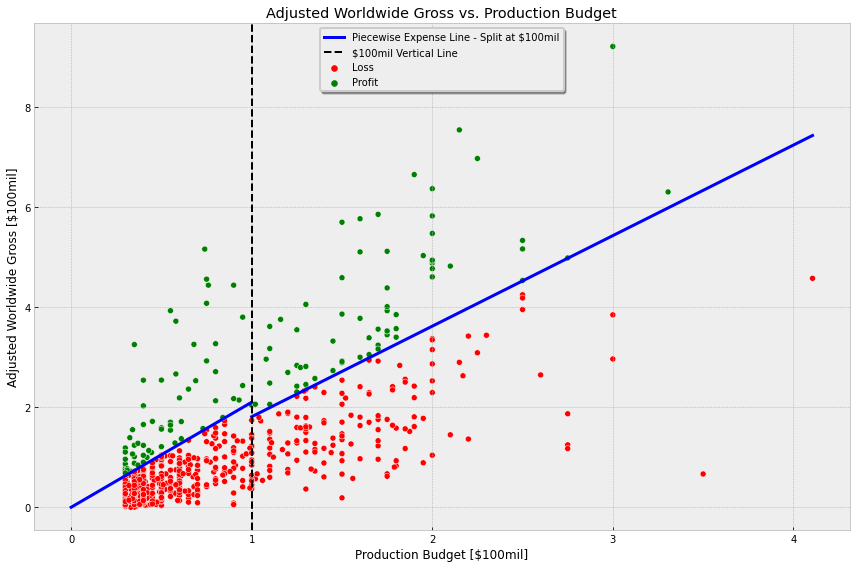

In [81]:
# Plot for produciton budget vs worldwide gross with added expense line
# This axes will have the most information since profit is determined from overall gross
df_adj_gt30milPB_copy = df_adj_gt30milPB.copy()
df_adj_gt30milPB_copy.production_budget = df_adj_gt30milPB_copy.production_budget/1e8
df_adj_gt30milPB_copy.adj_ww_gross = df_adj_gt30milPB_copy.adj_ww_gross/1e8
df_adj_gt30milPB_copy['profitable'] = ['Profit' if (POI >= 0) else 'Loss' for POI in df_adj_gt30milPB_copy.adj_POI]
fig, ax = plt.subplots(figsize=(12,8))

sns.scatterplot(data=df_adj_gt30milPB_copy, x='production_budget',
                y='adj_ww_gross', hue='profitable',
                palette=['red', 'green'], ax=ax);
# Plotting expense line for prod budget under $100mil
ax_diag_exp_l = xy_pos_diag(df_adj_gt30milPB_copy.production_budget,
                            df_adj_gt30milPB_copy.adj_ww_gross,
                            low_mark+1)
ax_line2 = ax.plot([0,1], [0, (1/ax_diag_exp_l[0][1])
                                 *ax_diag_exp_l[1][1]],
                   color='blue', linewidth=3,
                   label='Piecewise Expense Line - Split at $100mil');
# Plotting expense line for prod budget over $100mil
ax_diag_exp_h = xy_pos_diag(df_adj_gt30milPB_copy.production_budget,
                            df_adj_gt30milPB_copy.adj_ww_gross,
                            high_mark+1)
ax.plot([1, ax_diag_exp_h[0][1]], 
        [(1/ax_diag_exp_h[0][1])*ax_diag_exp_h[1][1],
        ax_diag_exp_h[1][1]], color='blue', linewidth=3);
# Plotting vertical line at $100mil 
ax_line4 = ax.axvline(x=1, ymin=0, ymax=1, color='black',
                      ls='--', label='$100mil Vertical Line');
ax.set_title('Adjusted Worldwide Gross vs. Production Budget');
ax.set_xlabel('Production Budget [$100mil]');
ax.set_ylabel('Adjusted Worldwide Gross [$100mil]');
leg = ax.legend(shadow=True);
leg.get_frame().set_linewidth(2)

# fig.savefig('images/figures/AdjwwGross_vs_PB.png', dpi=100)

plt.tight_layout();

## Resources
<ul>
    <li>Galloway, Stephen. “What Is the Most Profitable Movie Ever?” The Hollywood Reporter, The Hollywood Reporter, 18 Jan. 2020, https://www.hollywoodreporter.com/movies/movie-news/what-is-profitable-movie-ever-1269879/.</li>
    <li>Stephen Follows, Stephen. “How Films Make Money PT2: \$30m-\$100M Movies.” Stephen Follows, 6 July 2021, https://stephenfollows.com/films-make-money-pt2-30m-100m-movies/.</li>
    <li>Stephen Follows, Stephen. “How Movies Make Money: \$100m+ Hollywood Blockbusters.” Stephen Follows, 6 July 2021, https://stephenfollows.com/how-movies-make-money-hollywood-blockbusters/.</li>
</ul>